#  Исследование результатов А/В-теста и поиск инсайтов

SollmaFin — международное мобильное приложение для онлайн-торговли финансовыми активами. Пользователи могут инвестировать деньги в акции, валюту, криптовалюту, биржевые фонды (ETF) и другие активы. Целевая аудитория приложения — начинающие инвесторы. Получить доступ к финансовым рынкам можно со смартфона либо через веб-версию. 

Приложение ориентировано на рынок Латинской Америки с акцентом на четыре страны: Мексику, Бразилию, Колумбию и Аргентину — там быстро растёт интерес к финтеху и инвестициям, а экономики очень разные. 

Появилась гипотеза о недостаточной финансовой грамотности пользователей: они не понимают, как работать с активами разной степени риска. Клиенты покупают активы с высоким риском и теряют деньги, что снижает вовлечённость.
Команда продукта решила обновить онбординг пользователей и добавить в него детальную информацию о различиях финансовых активов и связанных с ними рисках. Однако появилось опасение, что углублённый онбординг отпугнёт клиентов от пополнения депозита и более рискованных вложений. 

Чтобы разобраться, команда решила провести A/B-эксперимент. 

### А/В-эксперимент

В эксперименте участвовали новые пользователи, которые зарегистрировались в приложении со 2 по 15 июня 2025 года. 
Пользователей случайным образом разделили на две равные группы: 
- Контрольная группа проходила стандартный онбординг без обязательного обучения.
- Тестовая группа проходила обновлённый онбординг с подробной информацией об активах и связанных с ними рисках. 

После разделения активность пользователей анализировали в течение недели.

Цель эксперимента — оценить, как обновлённый онбординг влияет на поведение пользователей и их дальнейшую инвестиционную активность.

При внедрении новой фичи команда продукта выдвинула такие гипотезы:
- Гипотеза роста: обучающий онбординг помогает пользователям лучше понимать принципы инвестирования, поэтому они будут чаще открывать второй депозит.
- Гипотеза риска: информация о возможных потерях и высоких рисках отпугнёт некоторых новичков, особенно самых осторожных, что снизит конверсию в первый депозит.
- Дополнительная гипотеза: после нового онбординга пользователи, которые выбрали высокорискованные активы, будут чаще, чем раньше, возвращаться и открывать второй депозит. При старом онбординге пользователи часто покупали активы с высоким риском без понимания последствий. Это приводило к потерям и оттоку после первого депозита. 

Чтобы увидеть полную картину, недостаточно следить за метриками конверсии. Команда выбрала для эксперимента такой набор метрик: 
- Ключевая метрика — средняя сумма всех депозитов на одного пользователя (включая тех, кто установил приложение или открыл веб-версию).
- Барьерная метрика — конверсия из регистрации в первый депозит.
- Вспомогательная метрика 1 — конверсия из первого депозита во второй.
- Вспомогательная метрика 2 — средняя сумма всех депозитов на пользователя, который открыл хотя бы один депозит.

Ожидалось, что ключевая и барьерная метрики не упадут, а вспомогательные покажут значительный рост. 


#### 1. Анализ исторических данных

Чтобы понять, для чего была разработана новая фича, вам предстоит изучить исторические данные: 
- Поведение новых пользователей, в том числе динамику привлечения, сегментацию и ключевые этапы воронки действий.
- Метрики, связанные с внесением депозитов, в том числе средние суммы депозитов. 

#### 2. Анализ данных А/В-теста

Изучение результатов эксперимента будет состоять из двух этапов: 
- Сравнение поведения пользователей в контрольной и тестовой группах, оценка статистической значимости изменений. 
- Исследование влияния нового онбординга на поведение платящих пользователей. В исследовании вы будете использовать бутстрап и сосредоточитесь на нижних и верхних перцентилях распределения депозитов. 
- Такой подход позволит понять, как обновлённый онбординг повлиял на ключевые бизнес-метрики, найти точки роста и сформулировать рекомендации по улучшению пользовательского опыта и монетизации.


### Данные

1. Датасет `/datasets/pa_sollmafin_hist.csv` содержит исторические данные о ключевых действиях новых пользователей, привлечённых в период с 1 апреля по 1 июня 2025 года включительно. В датасете собраны действия пользователей до оформления второго депозита. 
2. Датасет `/datasets/pa_sollmafin_abt.csv` содержит данные А/В-эксперимента — все действия новых пользователей, которые зарегистрировались со 2 по 15 июня 2025 года включительно. Данные собраны в рамках проверки гипотезы о влиянии нового онбординга на поведение и активность пользователей. Пользователи уже распределены по группам А/В-эксперимента.

Общие поля датасетов:
- `user_id` — уникальный идентификатор пользователя;
- `country_code` — код страны пользователя в формате ISO (например, `BR` — Бразилия, `MX` — Мексика, `AR` — Аргентина, `CO` — Колумбия);
- `platform` — устройство, с которого пользователь взаимодействует с продуктом: mobile или web;
- `first_ts` — время первого появления пользователя в системе;
- `first_dt` — дата первого появления пользователя (без времени);
- `event_ts` — время события;
- `event_name` — название события;
- `amount` — сумма пополнения депозита;
- `asset` — тип приобретённого актива; 
- `risk_level` — уровень риска актива: low — низкий риск, medium — средний риск, high — высокий риск.

В датасете `/datasets/pa_sollmafin_abt.csv` содержатся два дополнительных поля:
- `ab_test` — название А/В-эксперимента;
- `group` — пользовательская группа А/В-эксперимента.


### План проекта
1. Загрузка исторических данных и их предобработка
2. Исследовательский анализ исторических данных
3. Исследование результатов А/В эксперимента
4. Анализ изменений суммы депозитов на платящего пользователя
5. Выводы

In [44]:
# pip install --upgrade pandas matplotlib scipy seaborn numpy statsmodels skimpy

In [45]:
# Загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from skimpy import skim


## Часть 1

### 1. Загрузка исторических данных и их предобработка


In [46]:
# Импорт данных
df_hist = pd.read_csv('https://code.s3.yandex.net/datasets/pa_sollmafin_hist.csv')

In [47]:
# Информация о датафрейме df_hist
print("Информация о df_hist:")
df_hist.info()
print("\nПервые 5 строк:")
display(df_hist.head())
print("\nПроверка на пропущенные значения в df_hist:")
print(df_hist.isnull().sum())
print('\nКоличество дубликатов:')
print(df_hist.duplicated().sum())

Информация о df_hist:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238059 entries, 0 to 238058
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       238059 non-null  object 
 1   country_code  238059 non-null  object 
 2   platform      238059 non-null  object 
 3   first_ts      238059 non-null  object 
 4   first_dt      238059 non-null  object 
 5   event_ts      238059 non-null  object 
 6   event_name    238059 non-null  object 
 7   amount        33093 non-null   float64
 8   asset         15392 non-null   object 
 9   risk_level    15392 non-null   object 
dtypes: float64(1), object(9)
memory usage: 18.2+ MB

Первые 5 строк:


,user_id,country_code,platform,first_ts,first_dt,event_ts,event_name,amount,asset,risk_level
0,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 19:55:51,install / open_web,NaN,NaN,NaN
1,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 19:55:59,introduction,NaN,NaN,NaN
2,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 23:46:06,registration,NaN,NaN,NaN
3,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 23:46:15,main_page,NaN,NaN,NaN
4,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 23:47:59,onboarding_complete,NaN,NaN,NaN



Проверка на пропущенные значения в df_hist:
user_id              0
country_code         0
platform             0
first_ts             0
first_dt             0
event_ts             0
event_name           0
amount          204966
asset           222667
risk_level      222667
dtype: int64

Количество дубликатов:
0


In [48]:
skim(df_hist)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 238059 │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 10     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column   ┃ NA       ┃ NA %                  ┃ mean    ┃ sd      ┃ p0  ┃ p25  ┃ p50  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ amount   │   204966 │     86.09882424104948 │   113.5 │   34.47 │  27 │   90 │  109 │  131 │  524 │   █▇   │  │
│ └──────────┴──────────┴───────────────────────┴─────────┴─────────┴─────┴──────┴──────┴──────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃          ┃        ┃          ┃          ┃          ┃          ┃          ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column   ┃ NA     ┃ NA %     ┃ shortest ┃ longest  ┃ min      ┃ max      ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ user_id  │      0 │        0 │ 548ac59f │ 548ac59f │ 000194d5 │ fffec943 │       36 │         1 │   238059 │  │
│ │          │        │          │ -656d-41 │ -656d-41 │ -0b25-4c │ -d99c-4b │          │           │          │  │
│ │          │        │          │ 10-80d2- │ 10-80d2- │ 52-834d- │ 4f-a0ca- │          │           │          │  │
│ │          │        │          │ 49f0a217 │ 49f0a217 │ 7c812dad │ 7a813a50 │          │           │          │  │
│ │          │        │          │ f08a     │ f08a     │ ed6a     │ 6aa2     │          │           │          │  │
│ │ country_ │      0 │        0 │ BR       │ BR       │ AR       │ MX       │        2 │         1 │   238059 │  │
│ │ code     │        │          │          │          │          │          │          │           │          │  │
│ │ platform │      0 │        0 │ web      │ mobile   │ mobile   │ web      │      5.1 │         1 │   238059 │  │
│ │ first_ts │      0 │        0 │ 2025-04- │ 2025-04- │ 2025-04- │ 2025-06- │       19 │         2 │   476118 │  │
│ │          │        │          │ 02       │ 02       │ 01       │ 01       │          │           │          │  │
│ │          │        │          │ 19:55:51 │ 19:55:51 │ 00:06:34 │ 23:59:52 │          │           │          │  │
│ │ first_dt │      0 │        0 │ 2025-04- │ 2025-04- │ 2025-04- │ 2025-06- │       10 │         1 │   238059 │  │
│ │          │        │          │ 02       │ 02       │ 01       │ 01       │          │           │          │  │
│ │ event_ts │      0 │        0 │ 2025-04- │ 2025-04- │ 2025-04- │ 2025-06- │       19 │         2 │   476118 │  │
│ │          │        │          │ 02       │ 02       │ 01       │ 09       │          │           │          │  │
│ │          │        │          │ 19:55:51 │ 19:55:51 │

In [49]:
for column in ['platform', 'country_code', 'asset', 'risk_level']:
    unique_values = df_hist[column].unique()
    print(f"Столбец: {column}")
    print(f"Уникальные значения: {unique_values}")
    print(f"Количество уникальных: {len(unique_values)}")
    print("---")

Столбец: platform
Уникальные значения: ['mobile' 'web']
Количество уникальных: 2
---
Столбец: country_code
Уникальные значения: ['BR' 'AR' 'CO' 'MX']
Количество уникальных: 4
---
Столбец: asset
Уникальные значения: [nan 'stock' 'option' 'crypto']
Количество уникальных: 4
---
Столбец: risk_level
Уникальные значения: [nan 'medium' 'high' 'low']
Количество уникальных: 4
---


In [50]:
df_hist['first_ts'] = pd.to_datetime(df_hist['first_ts'])
df_hist['first_dt'] = pd.to_datetime(df_hist['first_dt'])
df_hist['event_ts'] = pd.to_datetime(df_hist['event_ts'])

- Данные имеют корректный вид и структуру
- Все даты находятся в нужном диапазоне (с 1 апреля по 1 июня 2025)
- Категориальные переменные имеют значения в соответствии с описанием данных
- Медиана и средняя сумм депозитов крайне близки, что говорит о близком к стандартному распределению данных, но верхний процентиль все же искажает данные
- Временные переменные приведены к соответствующему типу данных
- Пропуски имеют естественную природу, так как не все логированные события будут иметь характеристики депонирования средств или совершения покупки
- Дубликаты отсутствуют
- Можно приступать к работе

### 2. Исследовательский анализ исторических данных

#### Динамика привлечения новых пользователей в приложение.

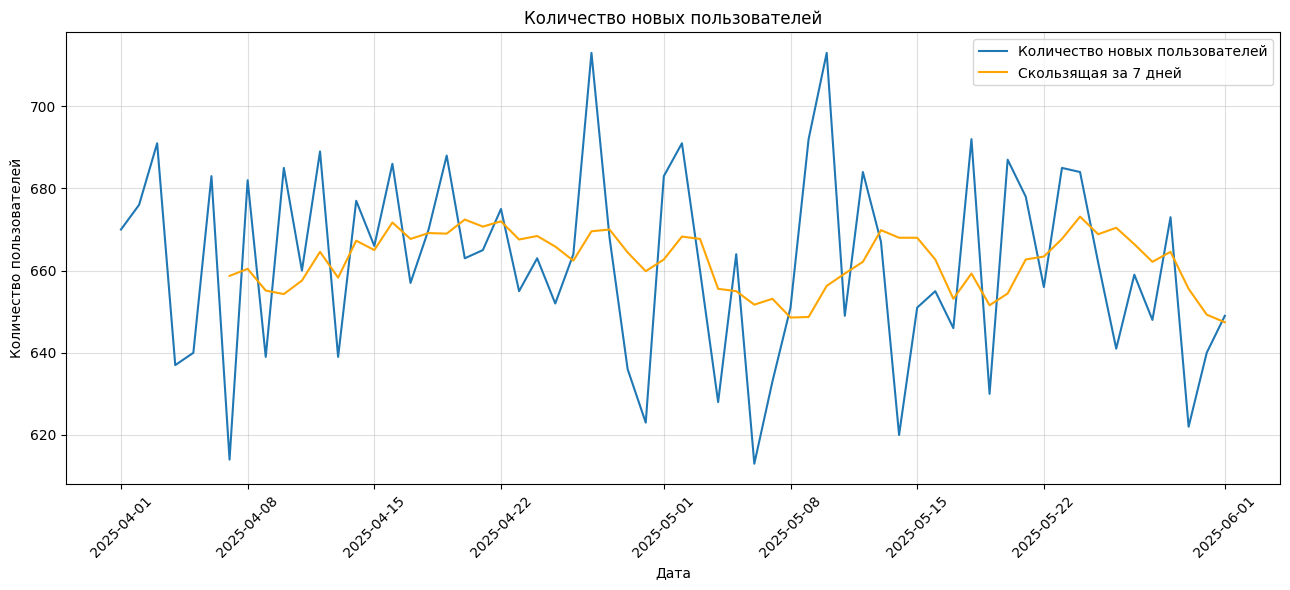

In [51]:
# Привлечение новых пользователей
hist_new_users = df_hist.query('event_name == "install / open_web"')

# Группируем по дате первого события и считаем уникальных пользователей
grouped_hist_new_users = hist_new_users.groupby('first_dt')['user_id'].nunique().reset_index()

grouped_hist_new_users['average_7'] = grouped_hist_new_users['user_id'].rolling(window=7).mean()

plt.figure(figsize=(13, 6))
sns.lineplot(data=grouped_hist_new_users, x='first_dt', y='user_id', label='Количество новых пользователей')
sns.lineplot(data=grouped_hist_new_users, x='first_dt', y='average_7', color='orange', label='Скользящая за 7 дней')
plt.title('Количество новых пользователей')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.grid(True, alpha=0.4)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

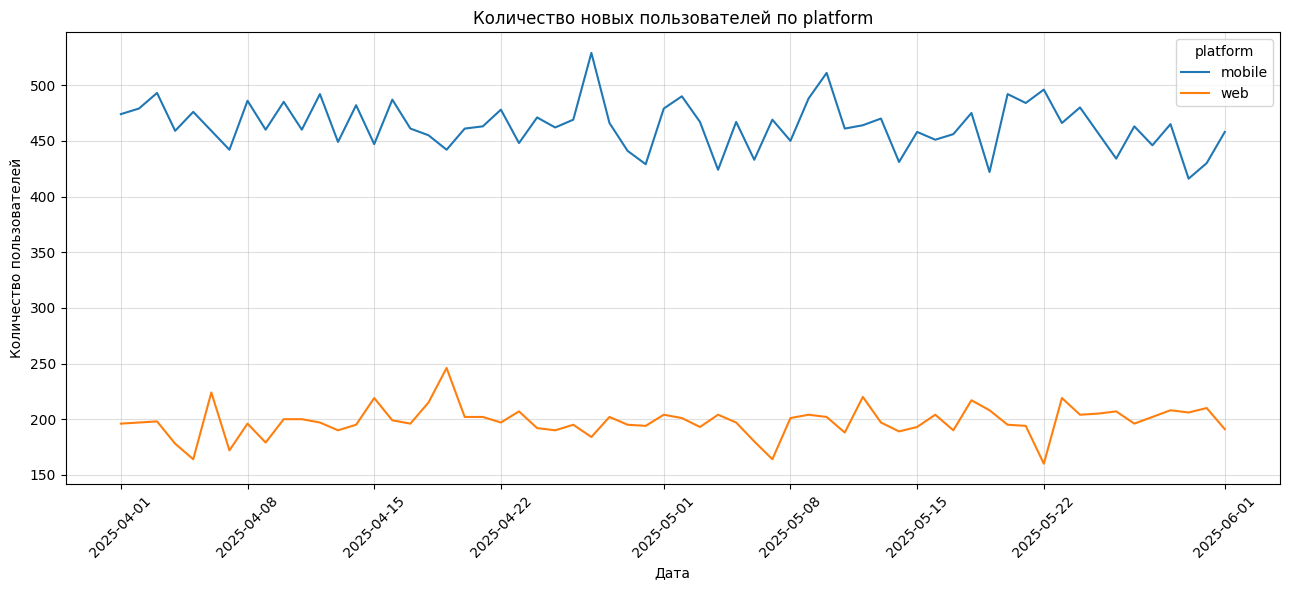

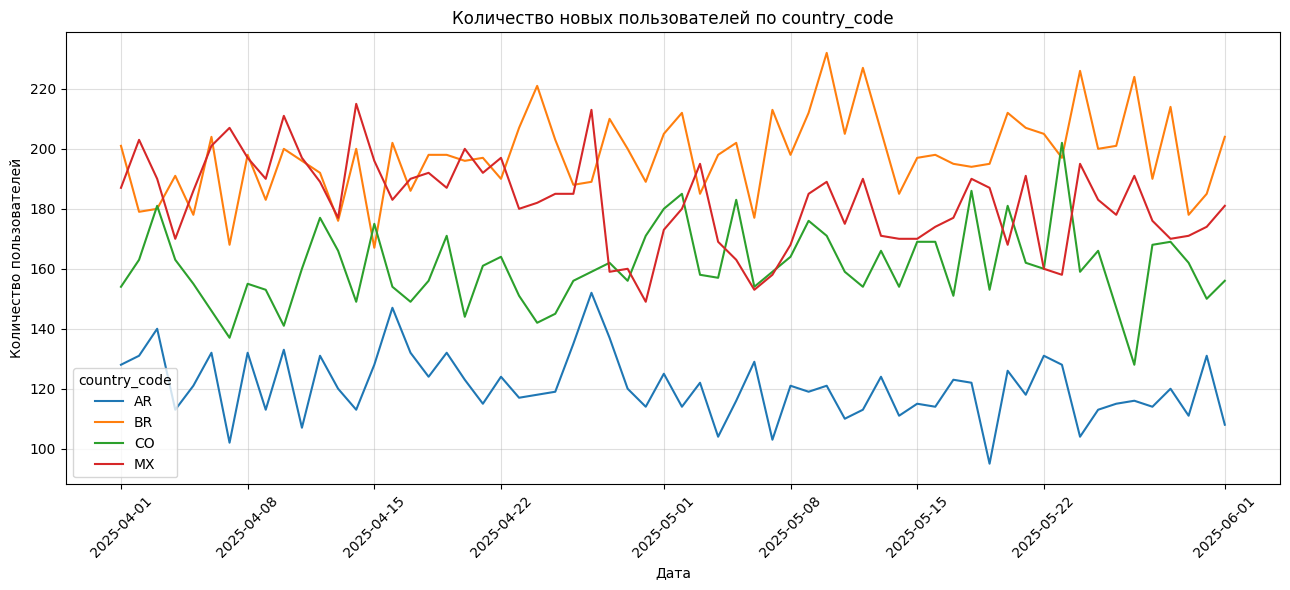

In [52]:
for group in ['platform', 'country_code']:

    # Группируем по дате первого события и считаем уникальных пользователей
    grouped_hist_new_users = hist_new_users.groupby(['first_dt', group])['user_id'].nunique().reset_index()

    plt.figure(figsize=(13, 6))
    sns.lineplot(data=grouped_hist_new_users, x='first_dt', y='user_id', hue=group)
    plt.title(f'Количество новых пользователей по {group}')
    plt.xlabel('Дата')
    plt.ylabel('Количество пользователей')
    plt.grid(True, alpha=0.4)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

- Приток новых пользователей действительно крайне стабилен (620-710 юников в день)
- Таким же образом стабилен прирост по платформам (мобайл = 420-520, веб = 160-250)
- По регионам заметен только лишь спад мексиканского региона до 2 места по привлечению пользователей, у всх стран метрики относительно стаблильны
- Распределение за 2 месяца имеет всего несколько отклонений в районе первой трети мая, но даже оно относительно несущественны из-за стабильности метрики, при этом к концу периода наблюдается тенденция к ухудшению метрики

#### Анализ воронок событий

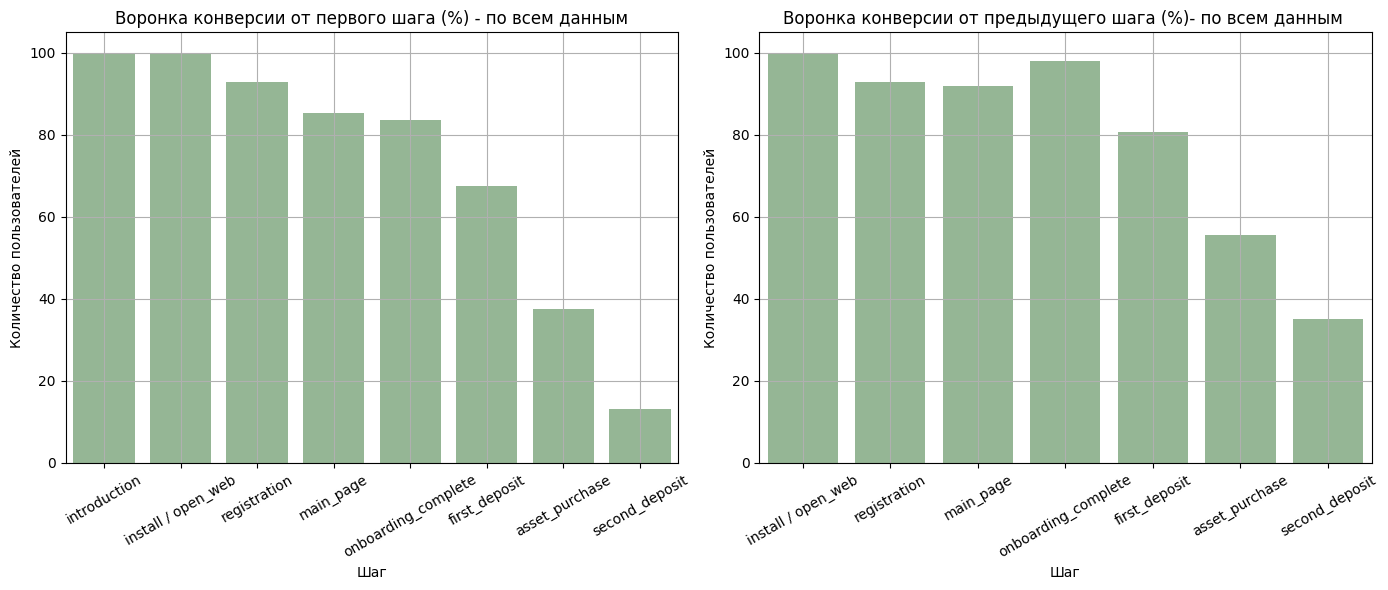

In [53]:
# Воронка конверсии
funnel_steps = df_hist.event_name.unique()

# Подсчет количества пользователей на каждом шаге
hist_funnel_count = (
    df_hist.query('event_name.isin(@funnel_steps)')
    .groupby(['event_name'], as_index=False)['user_id']
    .nunique()
    .rename(columns={'event_name': 'step', 'user_id': 'total_users'})
    .sort_values(by='total_users', ascending=False))

# Конверсия от первого шага
hist_funnel_count['CR_from_first'] = (
    hist_funnel_count['total_users'] / hist_funnel_count['total_users'].iloc[0] * 100).round(2)

# Конверсия от предыдущего шага
hist_funnel_count['CR_from_prev'] = (
    hist_funnel_count['total_users'] / hist_funnel_count['total_users'].shift(1) * 100).round(2)

# Визуализация воронки
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.barplot(data=hist_funnel_count, x='step', y='CR_from_first', color='darkseagreen')
plt.title(f'Воронка конверсии от первого шага (%) - по всем данным')
plt.xlabel('Шаг')
plt.ylabel('Количество пользователей')
plt.tight_layout()
plt.xticks(rotation=30)
plt.grid()

plt.subplot(1, 2, 2)
sns.barplot(data=hist_funnel_count[1:], x='step', y='CR_from_prev', color='darkseagreen')
plt.title(f'Воронка конверсии от предыдущего шага (%)- по всем данным ')
plt.xlabel('Шаг')
plt.ylabel('Количество пользователей')
plt.tight_layout()
plt.xticks(rotation=30)
plt.grid()
plt.show()

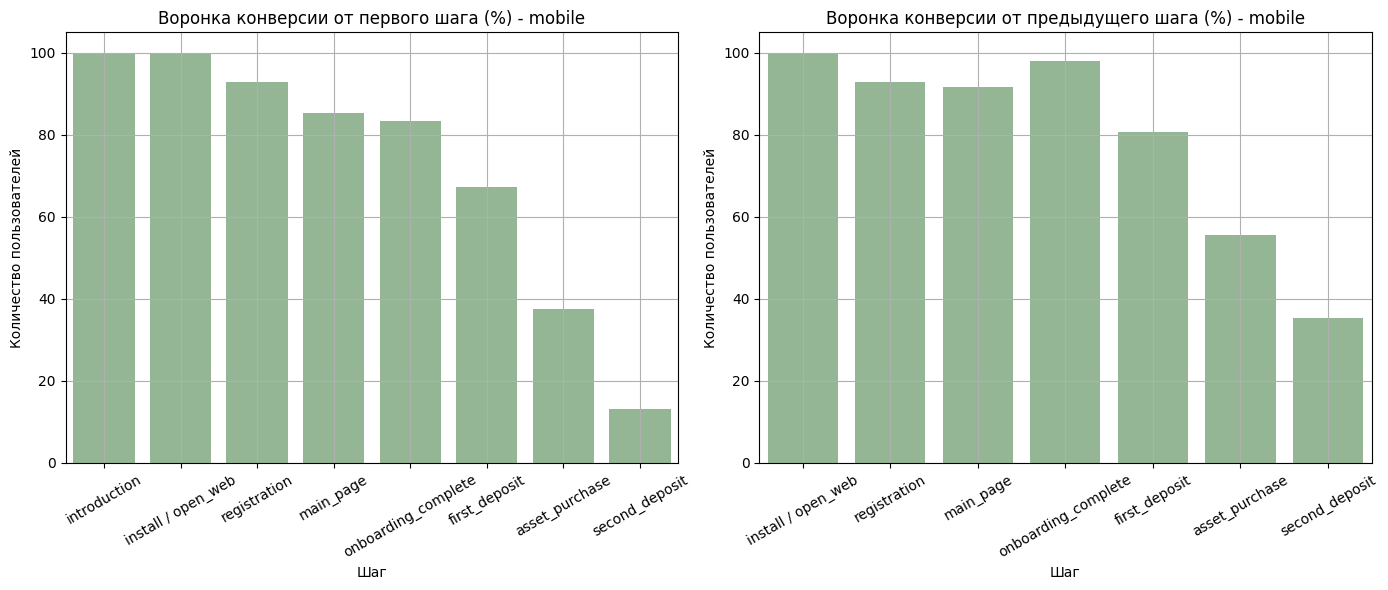

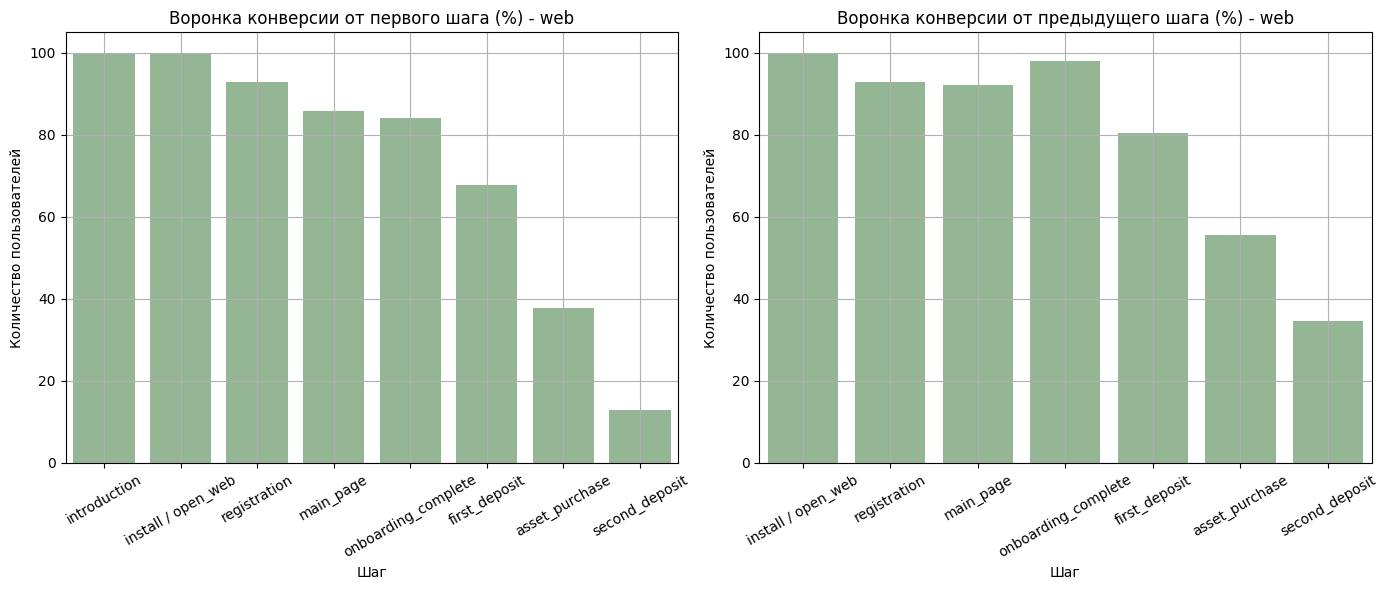

In [54]:
for group in df_hist['platform'].unique():
    # Подсчет количества пользователей на каждом шаге
    hist_funnel_count = (
        df_hist.query('event_name.isin(@funnel_steps) and platform == @group')
        .groupby(['event_name'], as_index=False)['user_id']
        .nunique()
        .rename(columns={'event_name': 'step', 'user_id': 'total_users'})
        .sort_values(by='total_users', ascending=False))

    # Конверсия от первого шага
    hist_funnel_count['CR_from_first'] = (
        hist_funnel_count['total_users'] / hist_funnel_count['total_users'].iloc[0] * 100).round(2)

    # Конверсия от предыдущего шага
    hist_funnel_count['CR_from_prev'] = (
        hist_funnel_count['total_users'] / hist_funnel_count['total_users'].shift(1) * 100).round(2)

    # Визуализация воронки
    plt.figure(figsize=(14,6))
    plt.subplot(1, 2, 1)
    sns.barplot(data=hist_funnel_count, x='step', y='CR_from_first', color='darkseagreen')
    plt.title(f'Воронка конверсии от первого шага (%) - {group}')
    plt.xlabel('Шаг')
    plt.ylabel('Количество пользователей')
    plt.tight_layout()
    plt.xticks(rotation=30)
    plt.grid()

    plt.subplot(1, 2, 2)
    sns.barplot(data=hist_funnel_count[1:], x='step', y='CR_from_prev', color='darkseagreen')
    plt.title(f'Воронка конверсии от предыдущего шага (%) - {group}')
    plt.xlabel('Шаг')
    plt.ylabel('Количество пользователей')
    plt.tight_layout()
    plt.xticks(rotation=30)
    plt.grid()
    plt.show()

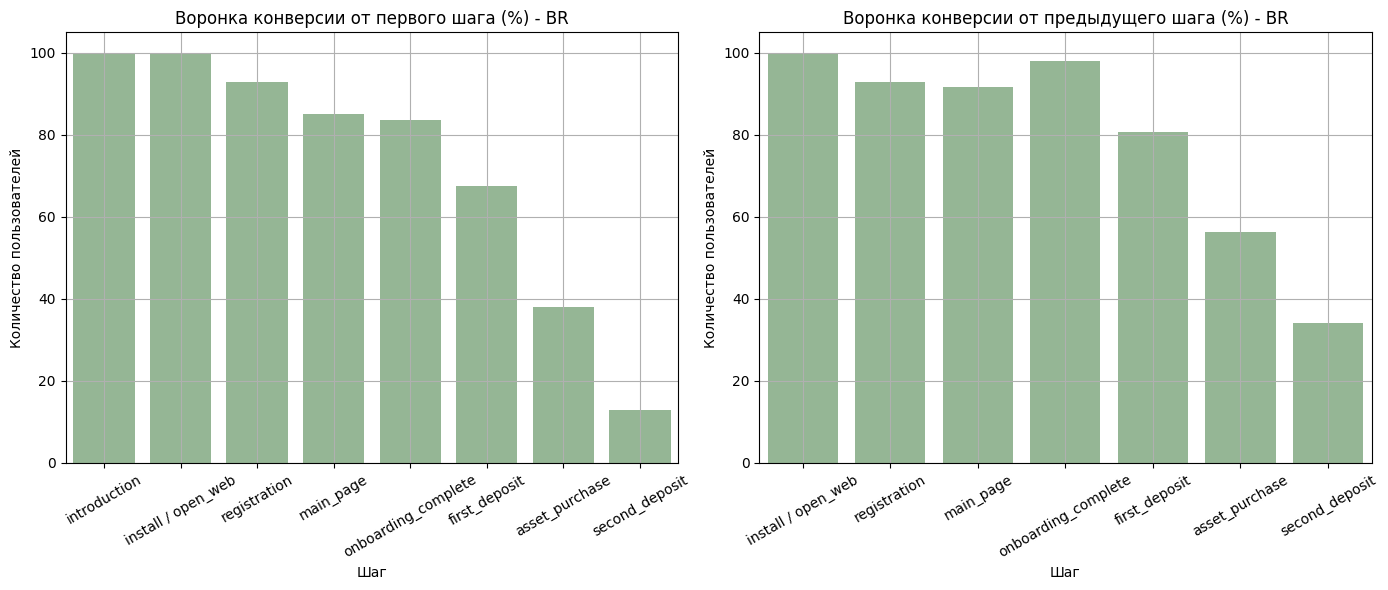

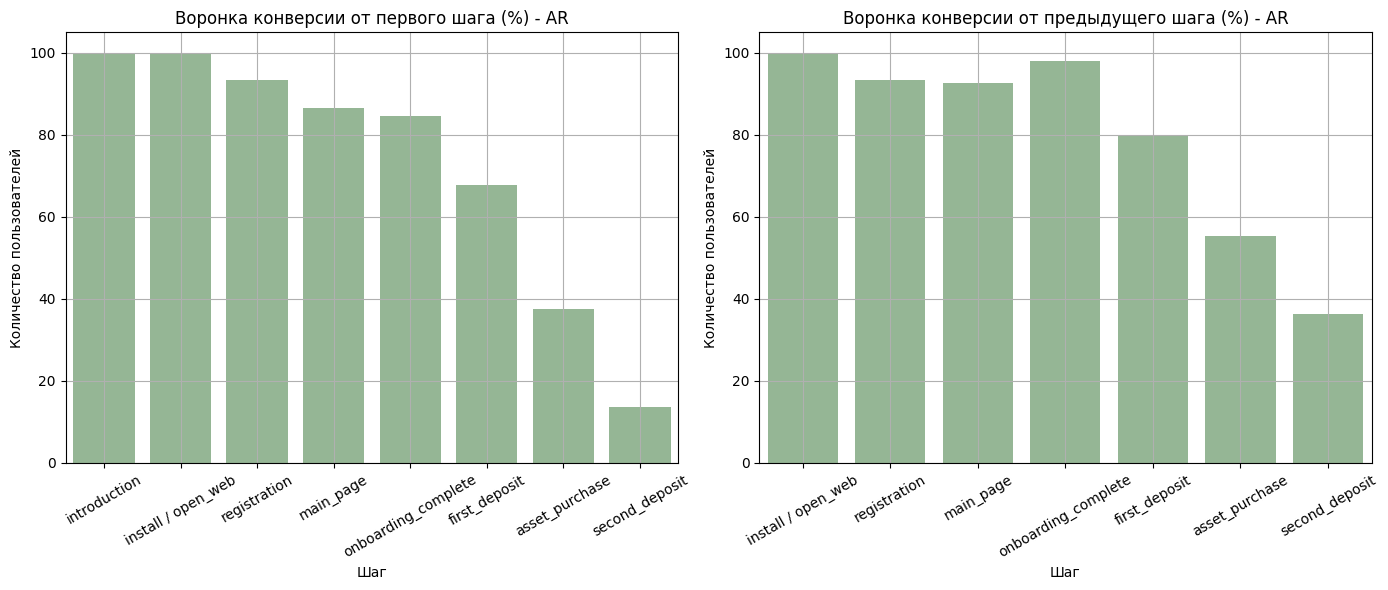

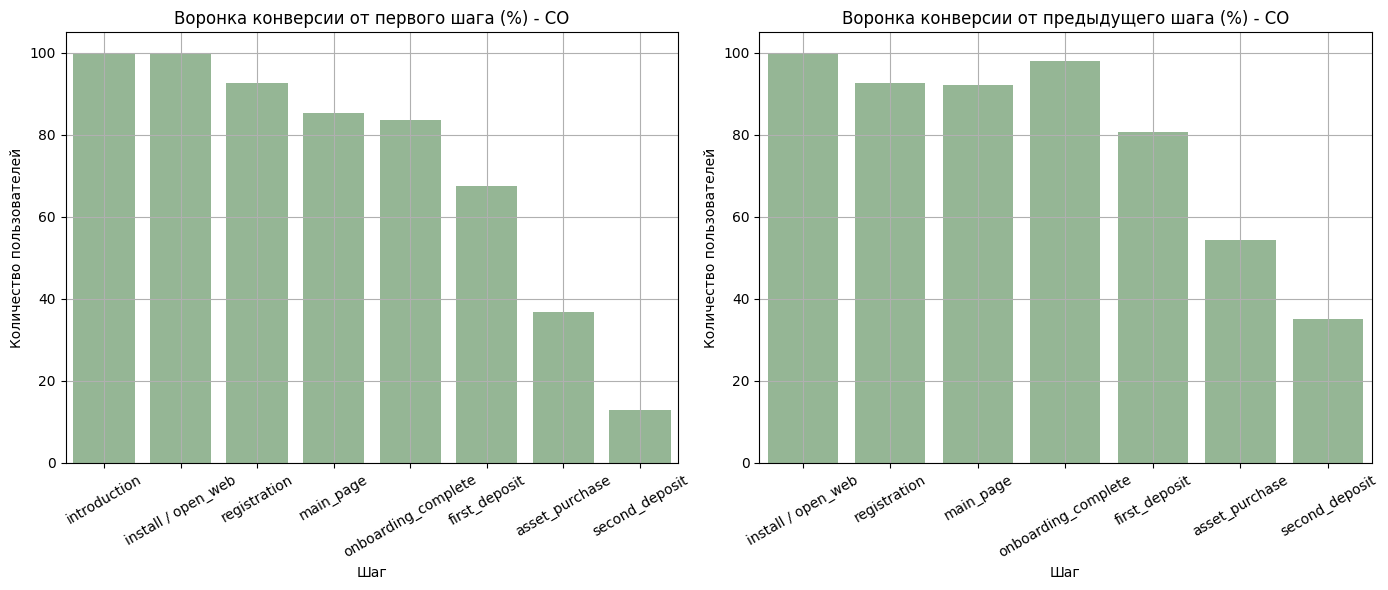

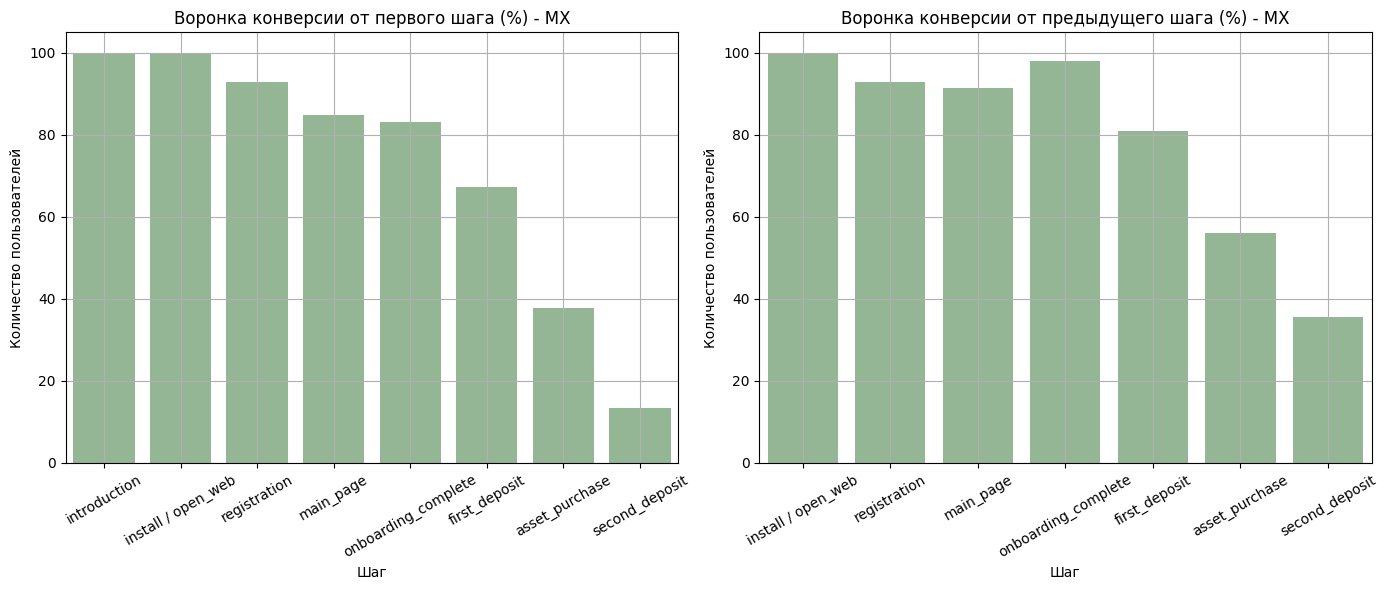

In [55]:
for group in df_hist['country_code'].unique():
    # Подсчет количества пользователей на каждом шаге
    hist_funnel_count = (
        df_hist.query('event_name.isin(@funnel_steps) and country_code == @group')
        .groupby(['event_name'], as_index=False)['user_id']
        .nunique()
        .rename(columns={'event_name': 'step', 'user_id': 'total_users'})
        .sort_values(by='total_users', ascending=False))

    # Конверсия от первого шага
    hist_funnel_count['CR_from_first'] = (
        hist_funnel_count['total_users'] / hist_funnel_count['total_users'].iloc[0] * 100).round(2)

    # Конверсия от предыдущего шага
    hist_funnel_count['CR_from_prev'] = (
        hist_funnel_count['total_users'] / hist_funnel_count['total_users'].shift(1) * 100).round(2)

    # Визуализация воронки
    plt.figure(figsize=(14,6))
    plt.subplot(1, 2, 1)
    sns.barplot(data=hist_funnel_count, x='step', y='CR_from_first', color='darkseagreen')
    plt.title(f'Воронка конверсии от первого шага (%) - {group}')
    plt.xlabel('Шаг')
    plt.ylabel('Количество пользователей')
    plt.tight_layout()
    plt.grid()
    plt.xticks(rotation=30)

    plt.subplot(1, 2, 2)
    sns.barplot(data=hist_funnel_count[1:], x='step', y='CR_from_prev', color='darkseagreen')
    plt.title(f'Воронка конверсии от предыдущего шага (%) - {group}')
    plt.xlabel('Шаг')
    plt.ylabel('Количество пользователей')
    plt.tight_layout()
    plt.xticks(rotation=30)
    plt.grid()
    plt.show()

- Фундаментальной разница между платформами или регионами по конверсии нет
- Наибольшие потери пользователей происходят на этапах первого депозита (\~67% от начала) и покупки активов (~37% от начала), что указывает на проблемы с монетизацией
- От установки до завершения онбординга конверсия остается высокой (83%), что говорит о качественном пользовательском опыте на старте
- Только ~13% пользователей доходят до второго депозита, что требует работы над удержанием и мотивацией к повторным действиям
- Самые большие точки оттоков пользователей в конверсии от предыдущего шага также при пополнении первого депозита, покупки актива и второго пополнения депозита

#### Влияние уровня риска актива на открытие второго депозита.  

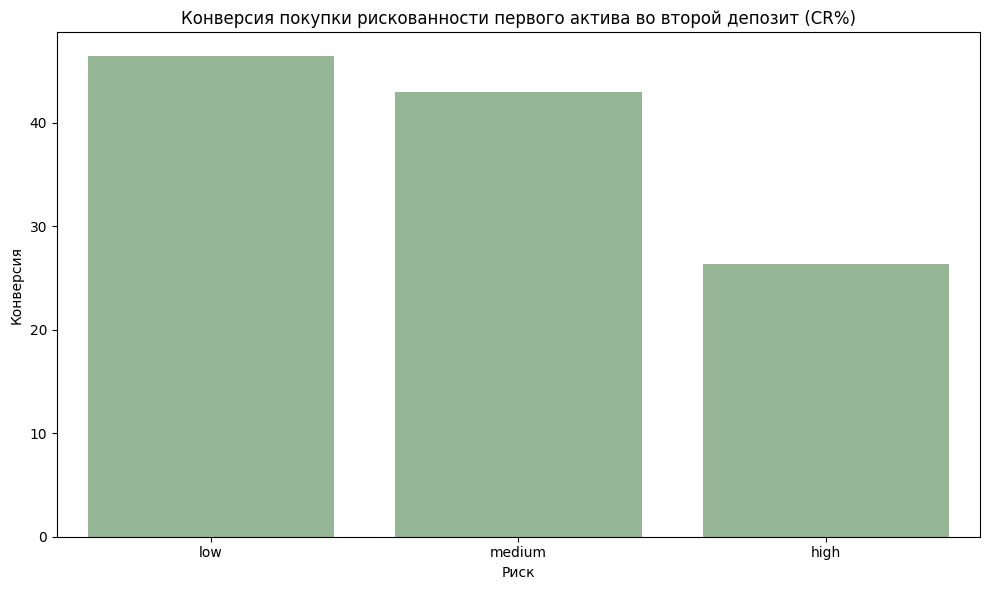

,risk_level,total_asset_purchses,reached_second_deposit,CR_%
0,low,2327,1080,46.41
1,medium,5325,2288,42.97
2,high,7740,2040,26.36


In [56]:
# Фильтруем пользователей по первому депозитному счету
asset_purchase_users = df_hist.query('event_name == "asset_purchase"')[['user_id', 'risk_level']]

# Фильтруем пользователей по второму депозитному счету
second_deposit_users = df_hist.query('event_name == "second_deposit"')['user_id']

# Объединяем
merged_risk_users = pd.merge(asset_purchase_users, second_deposit_users, on='user_id', how='left', indicator=True)
merged_risk_users['reached_second_deposit'] = merged_risk_users['_merge'] == 'both'

# Считаем конверсию
hist_conversion_risk_count = (
    merged_risk_users
    .groupby('risk_level')
    .agg(
        total_asset_purchses=('user_id', 'count'),
        reached_second_deposit=('reached_second_deposit', 'sum'))
    .sort_values(by='total_asset_purchses')
    .reset_index())

# Добавляем конверсию в %
hist_conversion_risk_count['CR_%'] = (
    hist_conversion_risk_count['reached_second_deposit'] 
    / hist_conversion_risk_count['total_asset_purchses'] 
    * 100).round(2)

plt.figure(figsize=(10, 6))
sns.barplot(data=hist_conversion_risk_count, x='risk_level', y='CR_%', color='darkseagreen')
plt.title('Конверсия покупки рискованности первого актива во второй депозит (CR%)')
plt.xlabel('Риск')
plt.ylabel('Конверсия')
plt.tight_layout()
plt.show()

display(hist_conversion_risk_count)

- Чем выше уровень риска первого актива, тем ниже вероятность второго депозита - от 45% для низкого риска до 25% для высокого (разница в 20 п.п.)

- Пользователи, начавшие с безопасных инвестиций, почти в 2 раза чаще продолжают инвестировать, что указывает на важность безопасного и финансово грамотного онбординга новичков

#### Анализ ключевой метрики на исторических данных

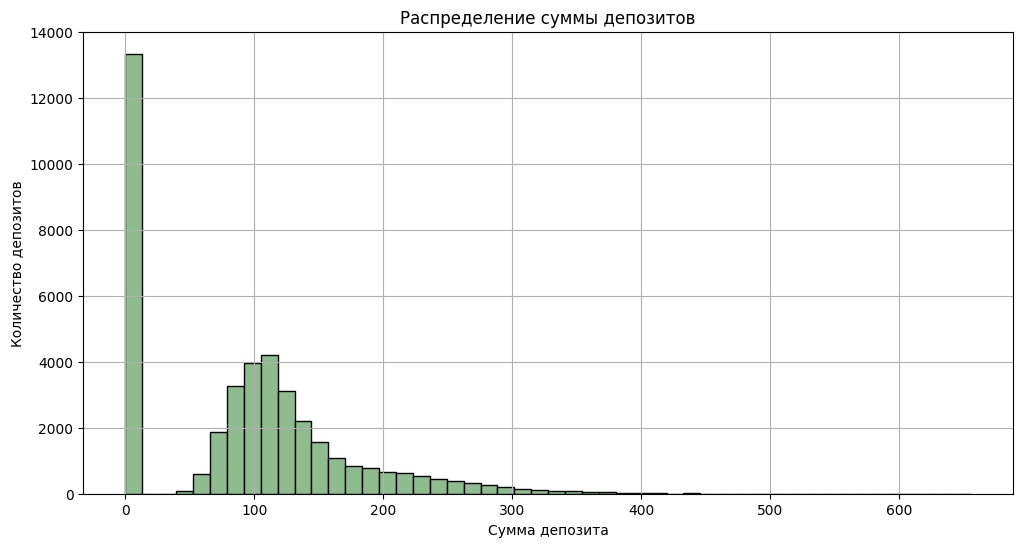

Ключевая метрика = 91.56$


,amount
count,41032.000000
mean,91.562220
std,80.393251
min,0.000000
25%,0.000000
50%,96.000000
75%,133.000000
max,656.000000


In [57]:
# Считаем ключевую метрику
users_deposits = df_hist.groupby('user_id')['amount'].sum().reset_index()
mean_users_deposit = users_deposits['amount'].mean().round(2)

# Визуализируем
plt.figure(figsize=(12, 6))
plt.hist(users_deposits['amount'], bins=50, color='darkseagreen', edgecolor='black')
plt.title('Распределение суммы депозитов')
plt.xlabel('Сумма депозита')
plt.ylabel('Количество депозитов')
plt.grid(True)
plt.show()

print(f'Ключевая метрика = {mean_users_deposit}$')
users_deposits.describe()

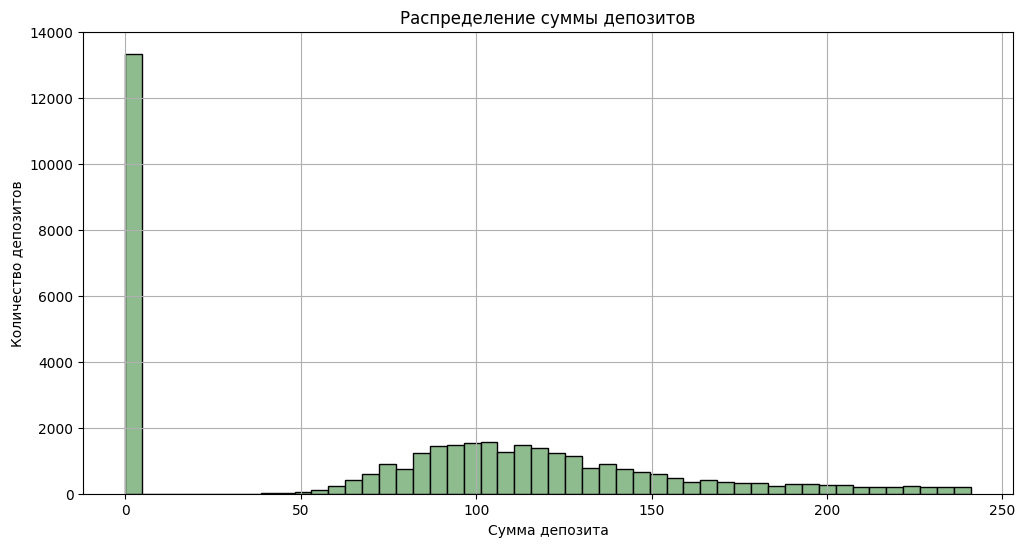

,amount
count,38980.000000
mean,81.162494
std,67.398206
min,0.000000
25%,0.000000
50%,93.000000
75%,126.000000
max,241.000000


In [58]:
# Вычиляем квантили
hist_lower_perc = users_deposits['amount'].quantile(0.05)
hist_higher_perc = users_deposits['amount'].quantile(0.95)

# Фильтруем данные
hist_users_deposits_perc = users_deposits.query('amount >= @hist_lower_perc and amount <= @hist_higher_perc')

plt.figure(figsize=(12, 6))
plt.hist(hist_users_deposits_perc['amount'], bins=50, color='darkseagreen', edgecolor='black')
plt.title('Распределение суммы депозитов')
plt.xlabel('Сумма депозита')
plt.ylabel('Количество депозитов')
plt.grid(True)
plt.show()

hist_users_deposits_perc.describe()

- Коэффициент вариации = Стандартное отклонение / Среднее значение = 80.39 / 91.56 = 87.8%
- Даже при отсечении нижних и верхних 5% данных мы все равно видим большой коэффициент вариации = 82.7%
- Это очень большой разброс в данных, связанный в первую очередь с тем, что мы учитываем всех пользователей, в том числе и с 0 суммой депозита, коих как минимум больше четверти от всех депозитов
- Подавляющее большинство депозитов находится в диапазоне до 200 долл., что указывает на осторожное поведение пользователей и преобладание небольших первых вложений
- Присутствуют редкие депозиты высоких сумм (до 600+ долл.), что говорит о существовании небольшой группы активных инвесторов, готовых к крупным вложениям
- Сильная асимметрия распределения показывает возможности для образовательных программ, направленных на повышение комфортного уровня инвестиций для основной неинвестирующей массы пользователей



## Часть 2

### 3. Исследование результатов А/В эксперимента.


In [59]:
# Импортируем данные 
df_ab = pd.read_csv('https://code.s3.yandex.net/datasets/pa_sollmafin_abt.csv')

In [60]:
# Информация о датафрейме df_ab
print("Информация о df_ab:")
df_ab.info()
print("\nПервые 5 строк:")
display(df_ab.head())
print("\nПроверка на пропущенные значения в df_ab:")
print(df_ab.isnull().sum())
print('\nКоличество дубликатов:')
print(df_ab.duplicated().sum())

Информация о df_ab:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54805 entries, 0 to 54804
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       54805 non-null  object 
 1   country_code  54805 non-null  object 
 2   platform      54805 non-null  object 
 3   first_ts      54805 non-null  object 
 4   first_dt      54805 non-null  object 
 5   event_ts      54805 non-null  object 
 6   event_name    54805 non-null  object 
 7   ab_test       54805 non-null  object 
 8   group         54805 non-null  object 
 9   amount        7843 non-null   float64
 10  asset         3750 non-null   object 
 11  risk_level    3750 non-null   object 
dtypes: float64(1), object(11)
memory usage: 5.0+ MB

Первые 5 строк:


,user_id,country_code,platform,first_ts,first_dt,event_ts,event_name,ab_test,group,amount,asset,risk_level
0,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-07 19:55:51,install / open_web,onboarding_test,test,NaN,NaN,NaN
1,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-07 19:55:54,introduction,onboarding_test,test,NaN,NaN,NaN
2,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-08 06:18:09,registration,onboarding_test,test,NaN,NaN,NaN
3,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-08 06:18:13,main_page,onboarding_test,test,NaN,NaN,NaN
4,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-08 06:33:40,onboarding_complete,onboarding_test,test,NaN,NaN,NaN



Проверка на пропущенные значения в df_ab:
user_id             0
country_code        0
platform            0
first_ts            0
first_dt            0
event_ts            0
event_name          0
ab_test             0
group               0
amount          46962
asset           51055
risk_level      51055
dtype: int64

Количество дубликатов:
0


In [61]:
skim(df_ab)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 54805  │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column   ┃ NA      ┃ NA %                  ┃ mean    ┃ sd    ┃ p0  ┃ p25  ┃ p50  ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ amount   │   46962 │     85.68926192865615 │   109.6 │  86.6 │  25 │   62 │   97 │  130.5 │  1050 │   █▁   │  │
│ └──────────┴─────────┴───────────────────────┴─────────┴───────┴─────┴──────┴──────┴────────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃          ┃       ┃          ┃          ┃          ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column   ┃ NA    ┃ NA %     ┃ shortest ┃ longest  ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ user_id  │     0 │        0 │ c430acb5 │ c430acb5 │ 0004bdca │ fff664fd- │       36 │         1 │    54805 │  │
│ │          │       │          │ -c6bf-43 │ -c6bf-43 │ -bbb8-41 │ e4eb-4a43 │          │           │          │  │
│ │          │       │          │ cf-8e2d- │ cf-8e2d- │ 35-ac72- │ -942d-862 │          │           │          │  │
│ │          │       │          │ 7ab9ce0d │ 7ab9ce0d │ 7b6f5684 │ b0493b299 │          │           │          │  │
│ │          │       │          │ 2c8a     │ 2c8a     │ fa69     │           │          │           │          │  │
│ │ country_ │     0 │        0 │ BR       │ BR       │ AR       │ MX        │        2 │         1 │    54805 │  │
│ │ code     │       │          │          │          │          │           │          │           │          │  │
│ │ platform │     0 │        0 │ web      │ mobile   │ mobile   │ web       │     5.12 │         1 │    54805 │  │
│ │ first_ts │     0 │        0 │ 2025-06- │ 2025-06- │ 2025-06- │ 2025-06-1 │       19 │         2 │   109610 │  │
│ │          │       │          │ 07       │ 07       │ 02       │ 5         │          │           │          │  │
│ │          │       │          │ 19:55:51 │ 19:55:51 │ 00:27:50 │ 23:58:39  │          │           │          │  │
│ │ first_dt │     0 │        0 │ 2025-06- │ 2025-06- │ 2025-06- │ 2025-06-1 │       10 │         1 │    54805 │  │
│ │          │       │          │ 07       │ 07       │ 02       │ 5         │          │           │          │  │
│ │ event_ts │     0 │        0 │ 2025-06- │ 2025-06- │ 2025-06- │ 2025-06-2 │       19 │         2 │   109610 │  │
│ │          │       │          │ 07       │ 07       │ 02       │ 2         │          │           │          │  │
│ │          │       │          │ 19:55:51 │ 19:55:51 │ 

In [62]:
for column in ['platform', 'country_code', 'asset', 'risk_level']:
    unique_values = df_ab[column].unique()
    print(f"Столбец: {column}")
    print(f"Уникальные значения: {unique_values}")
    print(f"Количество уникальных: {len(unique_values)}")
    print("---")

Столбец: platform
Уникальные значения: ['mobile' 'web']
Количество уникальных: 2
---
Столбец: country_code
Уникальные значения: ['BR' 'MX' 'CO' 'AR']
Количество уникальных: 4
---
Столбец: asset
Уникальные значения: [nan 'crypto' 'stock' 'option']
Количество уникальных: 4
---
Столбец: risk_level
Уникальные значения: [nan 'high' 'low' 'medium']
Количество уникальных: 4
---


In [63]:
# Изменение типа данных на datetime 
datetimes = ['first_ts', 'first_dt', 'event_ts']

for datetime in datetimes:
    df_ab[datetime] = pd.to_datetime(df_ab[datetime])

df_ab['event_ts_day'] = df_ab['event_ts'].dt.to_period('D').dt.to_timestamp()

- Данные также имеют корректный вид и структуру, но более суженный масштаб из-за более короткого временного промежутка
- Все даты находятся в нужном диапазоне (с 2 по 22 июня 2025)
- Категориальные переменные имеют значения в соответствии с описанием данных
- Медиана и средняя сумм депозитов недалеки друг от друга, что говорит об относительно близком к стандартному распределению данных, но верхний процентиль все же искажает среднюю
- Временные переменные приведены к соответствующему типу данных
- Пропуски имеют естественную природу, так как не все логированные события будут иметь характеристики депонирования средств или совершения покупки
- Дубликаты отсутствуют

####  Анализ аудитории эксперимента.

In [64]:
# Группировка
group_a = df_ab.query('group == "control"')
group_b = df_ab.query('group == "test"')

# Поиск пересечений
intersection = set(group_a['user_id']) & set(group_b['user_id'])
print(f'Количество юзеров попавших в обе группы A/B теста = {len(intersection)}')

Количество юзеров попавших в обе группы A/B теста = 0


/tmp/ipykernel_231548/1600321585.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ab_total_users, x='group', y='user_id', palette='Greens')


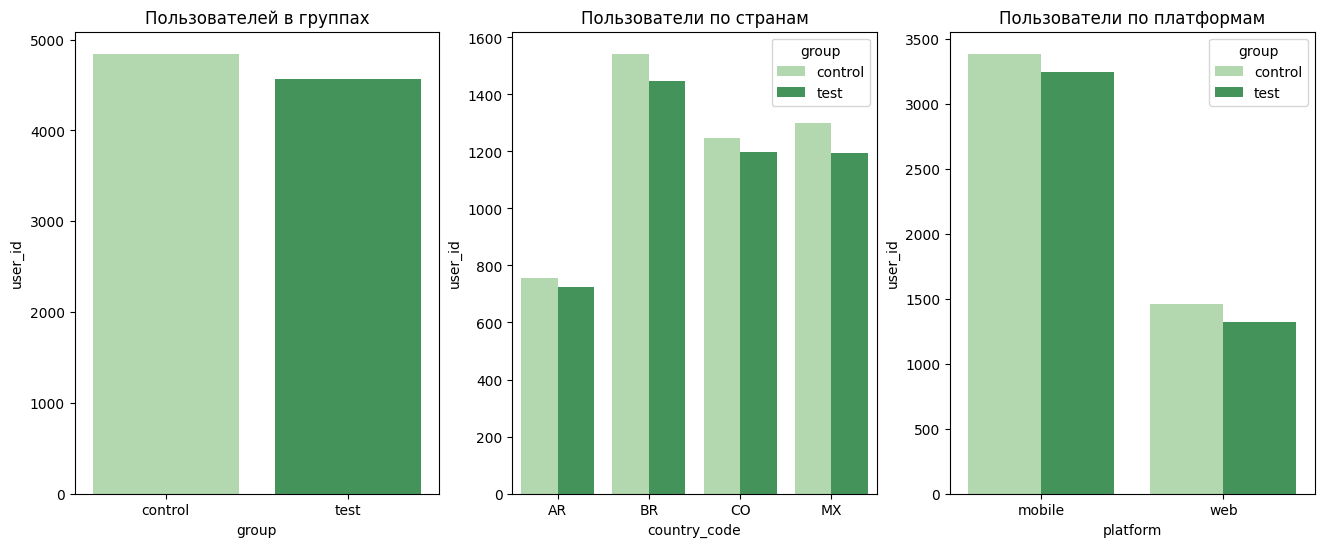

Разница количества человек в выборке = 6.11% или 279 человек


In [65]:
# Сравним количество пользователей по странам и платформам в каждой группе
ab_total_users = df_ab.groupby(['group'])['user_id'].nunique().reset_index()
ab_country_from = df_ab.groupby(['group', 'country_code'])['user_id'].nunique().reset_index()
ab_platform_from = df_ab.groupby(['group', 'platform'])['user_id'].nunique().reset_index()

# Визуализация
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.barplot(data=ab_total_users, x='group', y='user_id', palette='Greens')
plt.title('Пользователей в группах')
plt.subplot(1, 3, 2)
sns.barplot(data=ab_country_from, x='country_code', y='user_id', hue='group', palette='Greens')
plt.title('Пользователи по странам')
plt.subplot(1, 3, 3)
sns.barplot(data=ab_platform_from, x='platform', y='user_id', hue='group', palette='Greens')
plt.title('Пользователи по платформам')
plt.show()

# Подсчет разницы в выборках (%)
ab_difference = (
    (ab_total_users.query('group=="control"')['user_id'].iloc[0]
    / ab_total_users.query('group=="test"')['user_id'].iloc[0] - 1) * 100).round(2)

# Подсчет разницы в выборках (чел.)
ab_difference_abs = (
    ab_total_users.query('group=="control"')['user_id'].iloc[0] 
    - ab_total_users.query('group=="test"')['user_id'].iloc[0])

print(f'Разница количества человек в выборке = {ab_difference}% или {ab_difference_abs} человек')

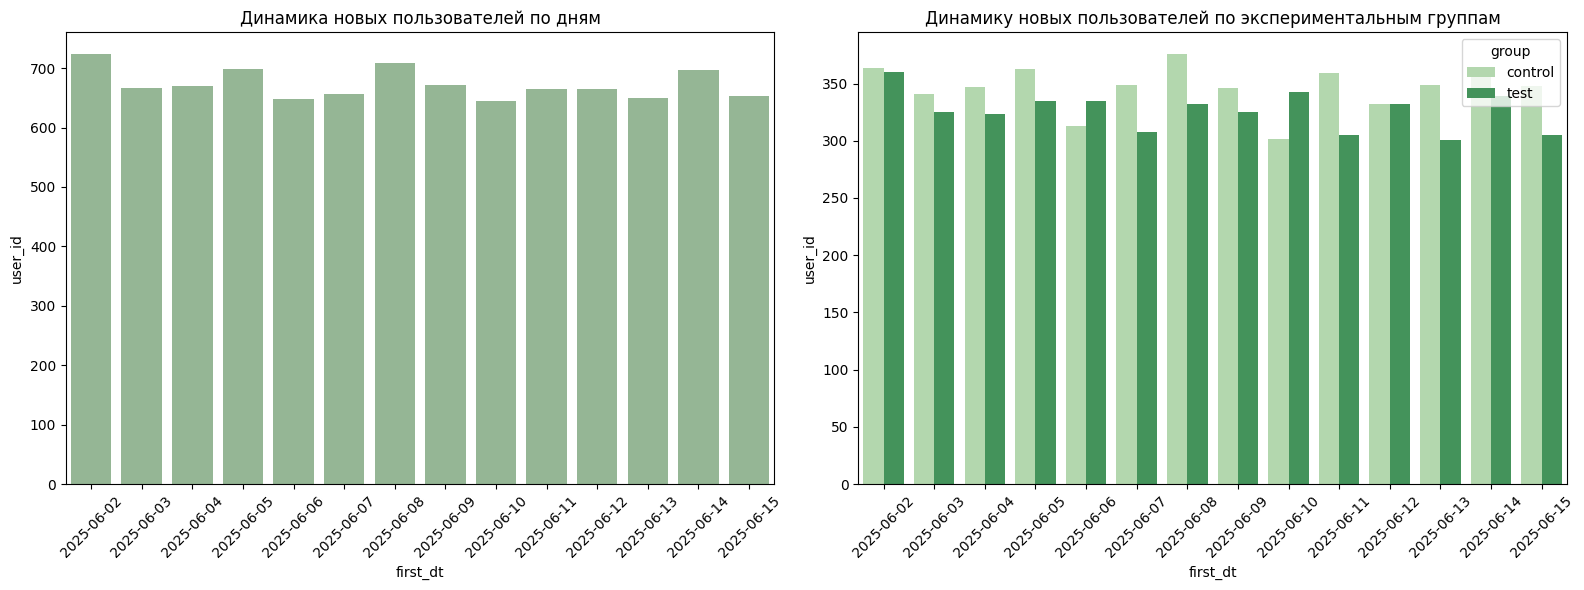

In [66]:
ab_new_users_everyday = df_ab.groupby('first_dt')['user_id'].nunique().reset_index()
ab_new_users_everyday_group = df_ab.groupby(['first_dt', 'group'])['user_id'].nunique().reset_index()

# Визуализация
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=ab_new_users_everyday, x='first_dt', y='user_id', color='darkseagreen')
plt.title('Динамика новых пользователей по дням')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.barplot(data=ab_new_users_everyday_group, x='first_dt', y='user_id', hue='group', palette='Greens')
plt.title('Динамику новых пользователей по экспериментальным группам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Группы не имеют пересечений, сплитование произошло корректно и без нареканий
- Выборки немного неравны по общему количеству пользователей с небольшим перевесом в сторону контрольной группы, в том числе по графику привлечения новых пользователей, но пропорции распределения по группам крайне схожи, что говорит о качественном сплитовании пользователей с небольшой разницей в размере выборок
- Незначительная разница в размерах выборок не критична и не повлияет на статистическую значимость результатов анализа. Эксперимент готов к анализу основных метрик без дополнительных корректировок.

#### Сравнение воронок событий.

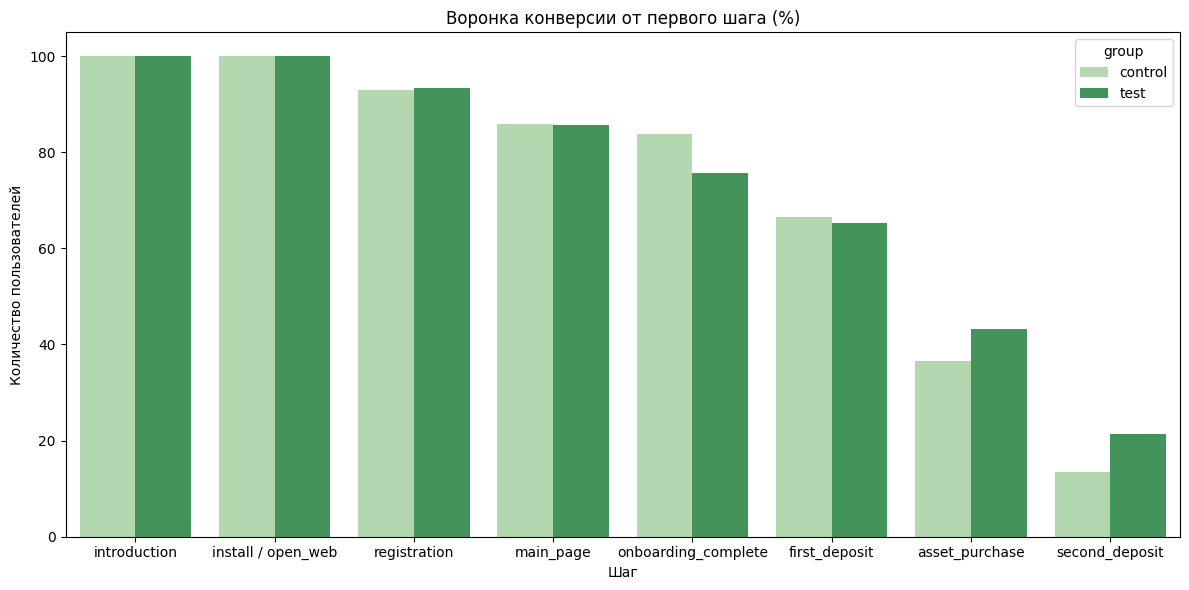

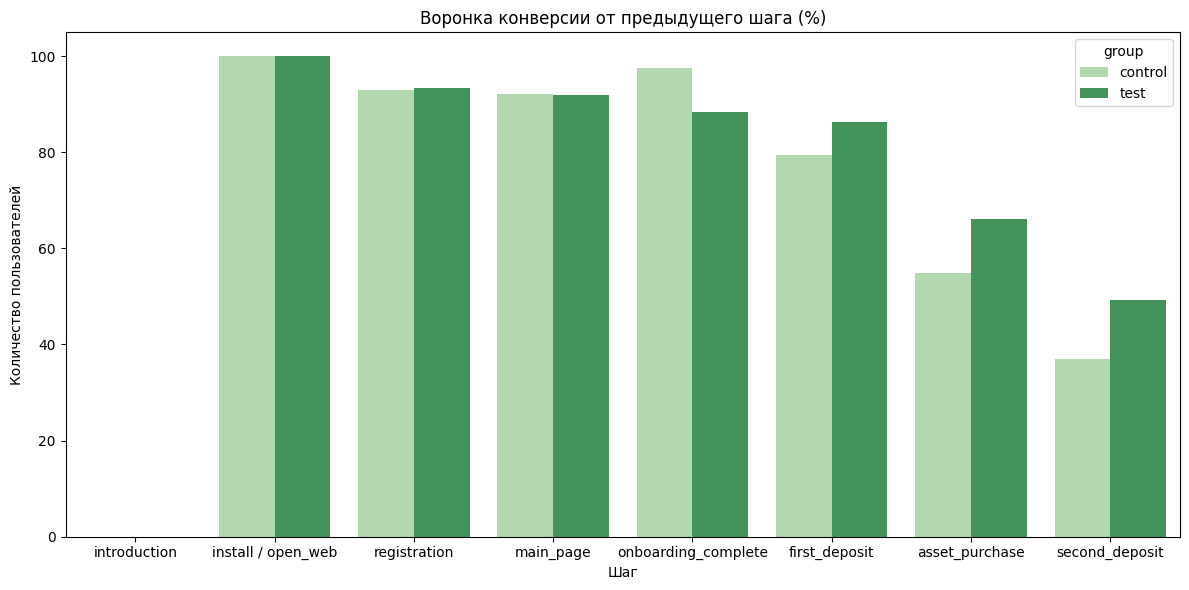

In [67]:
# Функция для расчета конверсии по этапам
def calculate_funnel(df, group, funnel_steps):
    group_df = df.query('group == @group')
    funnel_count = (
        group_df.query('event_name.isin(@funnel_steps)')
        .groupby(['event_name', 'group'], as_index=False)['user_id']
        .nunique()
        .rename(columns={'event_name': 'step', 'user_id': 'total_users'})
        .sort_values(by='total_users', ascending=False))

    # Конверсия от первого шага
    funnel_count['CR_from_first'] = (
        funnel_count['total_users'] / funnel_count['total_users'].iloc[0] * 100).round(2)

    # Конверсия от предыдущего шага
    funnel_count['CR_from_prev'] = (
        funnel_count['total_users'] / funnel_count['total_users'].shift(1) * 100).round(2)
    
    return funnel_count

# Вычисляем конверсию для контрольной и тестовой групп
a_funnel_count = calculate_funnel(df_ab, 'control', funnel_steps)
b_funnel_count = calculate_funnel(df_ab, 'test', funnel_steps)

# Объединяем данные
merged_ab_count_cr = pd.concat([a_funnel_count, b_funnel_count], ignore_index=True)

# Визуализация воронки
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_ab_count_cr, x='step', y='CR_from_first', hue='group', palette='Greens')
plt.title('Воронка конверсии от первого шага (%)')
plt.xlabel('Шаг')
plt.ylabel('Количество пользователей')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=merged_ab_count_cr, x='step', y='CR_from_prev', hue='group', palette='Greens')
plt.title('Воронка конверсии от предыдущего шага (%)')
plt.xlabel('Шаг')
plt.ylabel('Количество пользователей')
plt.tight_layout()
plt.show()

- Гипотеза роста полностью подтвердилась — конверсия из первого депозита во второй депозит значительно выросла в тестовой группе (13% → 21%, рост на 58%), что указывает на более вовлеченное поведение пользователей
- Дополнительная гипотеза подтверждена — пользователи после нового онбординга не только чаще возвращаются для второго депозита, но и активнее покупают активы (36% → 43%), что свидетельствует о лучшем понимании инвестиционных принципов


####  Влияние новой фичи на конверсию во второй депозит с учётом уровня риска купленного актива. 

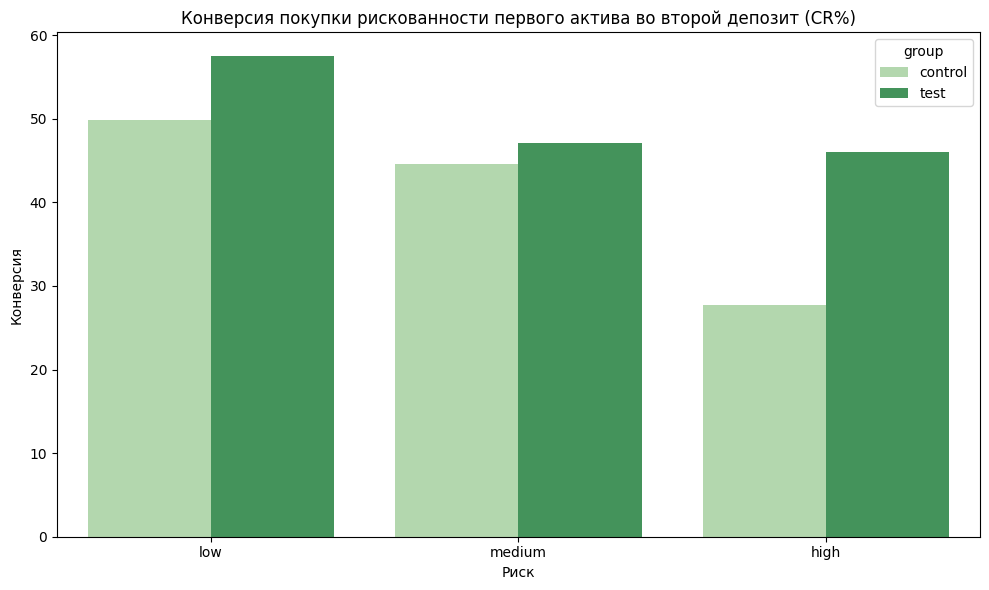

In [68]:
def risk_conversion(df, group):
    group_df = df.query('group == @group')
    # Фильтруем пользователей по первому депозитному счету
    asset_purchase_users = group_df.query('event_name == "asset_purchase"')[['user_id', 'risk_level', 'group']]

    # Фильтруем пользователей по второму депозитному счету
    second_deposit_users = group_df.query('event_name == "second_deposit"')['user_id']

    # Объединяем
    merged_risk_users = pd.merge(
        asset_purchase_users, 
        second_deposit_users, 
        on='user_id', 
        how='left', 
        indicator=True)
    merged_risk_users['reached_second_deposit'] = merged_risk_users['_merge'] == 'both'

    # Считаем конверсию
    conversion_risk_count = (
        merged_risk_users
        .groupby(['risk_level', 'group'])
        .agg(
            total_asset_purchses=('user_id', 'count'),
            reached_second_deposit=('reached_second_deposit', 'sum'))
        .sort_values(by='total_asset_purchses')
        .reset_index())

    # Добавляем конверсию в %
    conversion_risk_count['CR_%'] = (
        conversion_risk_count['reached_second_deposit'] 
        / conversion_risk_count['total_asset_purchses'] * 100).round(2)
    return conversion_risk_count

# Вычисляем конверсию для контрольной и тестовой групп
a_risk_conversion = risk_conversion(df_ab, 'control')
b_risk_conversion = risk_conversion(df_ab, 'test')

# Объединяем данные
mereged_risk_conversion = pd.concat([a_risk_conversion, b_risk_conversion], ignore_index=True)


plt.figure(figsize=(10, 6))
sns.barplot(data=mereged_risk_conversion, x='risk_level', y='CR_%', hue='group', palette='Greens')
plt.title('Конверсия покупки рискованности первого актива во второй депозит (CR%)')
plt.xlabel('Риск')
plt.ylabel('Конверсия')
plt.tight_layout()
plt.show()

In [69]:
# Конвертируем датафреймы в словари
a_risk_conversion_dict = dict(zip(
    a_risk_conversion['risk_level'],
    zip(a_risk_conversion['total_asset_purchses'], a_risk_conversion['reached_second_deposit'])
))
a_risk_conversion_dict

{'low': (285, 142), 'medium': (595, 265), 'high': (893, 247)}

In [70]:
b_risk_conversion_dict = dict(zip(
    b_risk_conversion['risk_level'],
    zip(b_risk_conversion['total_asset_purchses'], b_risk_conversion['reached_second_deposit'])
))
b_risk_conversion_dict

{'low': (496, 285), 'high': (737, 339), 'medium': (744, 350)}

- Нулевая гипотеза - конверсия покупки по рискованности первого актива во второй депозит между группами не отличается
- Альтернативная гипотеза - конверсия покупки по рискованности первого актива во второй депозит между группами отличается

In [71]:
# Проходим циклом по словарям
for risk in ['low', 'medium', 'high']:
    # Проводим z-test пропорций
    total = [a_risk_conversion_dict[risk][0], b_risk_conversion_dict[risk][0]]
    success = [a_risk_conversion_dict[risk][1], b_risk_conversion_dict[risk][1]]

    alpha = 0.05

    proportion_zest, p_value = proportions_ztest(
        success,
        total,
        alternative='two-sided')
    
    # Проведем z-test
    if p_value < alpha:
        print(f'Для уровня риска {risk} разница пропорций статистически значима, p-value = {p_value:.4f}')
    else:
        print(f'Для уровня риска {risk} разница пропорций не статистически значима, p-value = {p_value:.4f}')

Для уровня риска low разница пропорций статистически значима, p-value = 0.0391
Для уровня риска medium разница пропорций не статистически значима, p-value = 0.3607
Для уровня риска high разница пропорций статистически значима, p-value = 0.0000


- Низкорискованные активы — незначительное улучшение конверсии в тестовой группе (50% → ~57%), что указывает на умеренный положительный эффект нового онбординга для консервативных инвесторов
- Среднерискованные активы — минимальные изменения между группами (45% → 47%), новый онбординг практически не повлиял на поведение пользователей этого сегмента
- Высокорискованные активы — **наиболее значительное улучшение** конверсии (28% → 45%, рост на 60%), что полностью подтверждает дополнительную гипотезу о том, что более грамотно обученные пользователи чаще возвращаются после покупки рискованных активов

- Видим статистическую значимость у группы с низкорисковыми активами и крайне высокую значимость у высокорисковых клиентов
- Что же касается клиентов, покупающих активы среднего риска, хотя абсолютно их показатель и увеличился, но данное увеличение не статистически значимо

#### Анализ метрик А/В-эксперимента.
- Ключевая метрика — средняя сумма всех депозитов на одного пользователя (включая тех, кто установил приложение или открыл веб-версию).
- Барьерная метрика — конверсия из регистрации в первый депозит.
- Вспомогательная метрика 1 — конверсия из первого депозита во второй.
- Вспомогательная метрика 2 — средняя сумма всех депозитов на пользователя, который открыл хотя бы один депозит.


#### Ключевая метрика — средняя сумма всех депозитов на одного пользователя (включая тех, кто установил приложение или открыл веб-версию).

In [72]:
# Считаем ключевую метрику
def users_deposits(df, group):
    group_df = df.query('group == @group')
    users_deposits = group_df.groupby('user_id')['amount'].sum().reset_index()
    mean_users_deposit = users_deposits['amount'].mean().round(2)
    return mean_users_deposit

a_mean_users_deposit = users_deposits(df_ab, 'control')
b_mean_users_deposit = users_deposits(df_ab, 'test')

print(f'Ключевая метрика группы A = {a_mean_users_deposit}$')
print(f'Ключевая метрика группы В = {b_mean_users_deposit}$')
print(f'Абсолютная разница = {(b_mean_users_deposit - a_mean_users_deposit).round(2)}$ в пользу тестовой группы')
print(f'Относительная разница = {((b_mean_users_deposit / a_mean_users_deposit - 1) * 100).round(2)}% в пользу тестовой группы')

Ключевая метрика группы A = 90.24$
Ключевая метрика группы В = 92.46$
Абсолютная разница = 2.22$ в пользу тестовой группы
Относительная разница = 2.46% в пользу тестовой группы


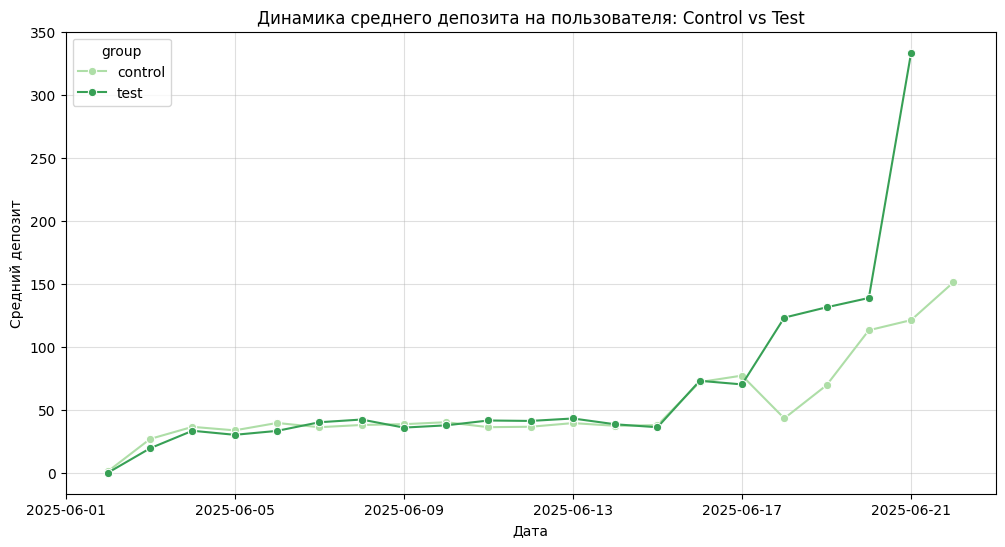

In [73]:
# Считаем накопленную динамику изменения по дням эксперимента для каждой группы
users_deposits = df_ab.groupby(['event_ts_day', 'user_id', 'group'])['amount'].sum().reset_index()
mean_date_users_deposit = users_deposits.groupby(['event_ts_day', 'group'])['amount'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=mean_date_users_deposit, 
    x='event_ts_day', 
    y='amount', 
    hue='group', 
    palette='Greens',
    marker='o')
plt.title(f'Динамика среднего депозита на пользователя: Control vs Test')
plt.xlabel('Дата')
plt.ylabel('Средний депозит')
plt.grid(alpha=0.4)
plt.show()


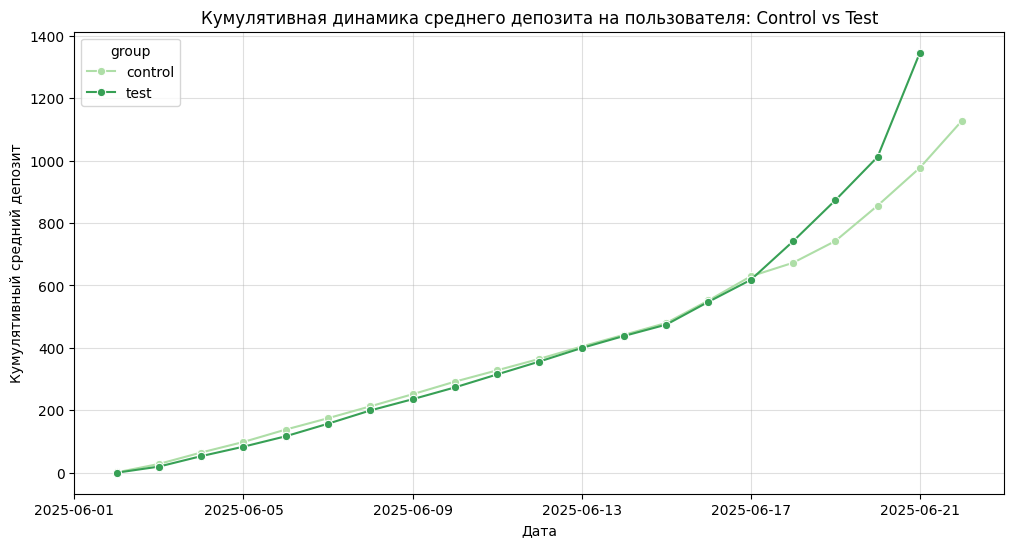

In [74]:
users_deposits = df_ab.groupby(['event_ts_day', 'user_id', 'group'])['amount'].sum().reset_index()
mean_date_users_deposit = users_deposits.groupby(['event_ts_day', 'group'])['amount'].mean().reset_index()

mean_date_users_deposit['cumulative_amount'] = mean_date_users_deposit.groupby('group')['amount'].cumsum()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=mean_date_users_deposit, 
    x='event_ts_day', 
    y='cumulative_amount', 
    hue='group', 
    palette='Greens',
    marker='o')
plt.title(f'Кумулятивная динамика среднего депозита на пользователя: Control vs Test')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний депозит')
plt.grid(alpha=0.4)
plt.show()

- Нулевая гипотеза - средняя сумма всех депозитов на одного пользователя между группами не отличается
- Альтернативная гипотеза - средняя сумма всех депозитов на одного пользователя между группами отличается

In [75]:
# Данные для t-test
ttest_users_deposits = df_ab.groupby(['user_id', 'group'])['amount'].sum().reset_index()
control_users_deposits = ttest_users_deposits.query('group == "control"')['amount']
test_users_deposits = ttest_users_deposits.query('group == "test"')['amount']

print('Если взять данные за весь эксперимент, то мы:')
# Проведем t-test
stat, p_value = ttest_ind(control_users_deposits, test_users_deposits)
if p_value < 0.05:
    print(f'Видим, что альтернативная гипотеза верна, разница статистически значима, так как p_value = {round(p_value, 3)}')
else:
    print(f'Видим, что нулевая гипотеза верна, разница не статистически значима, так как p_value = {round(p_value, 3)}')

Если взять данные за весь эксперимент, то мы:
Видим, что нулевая гипотеза верна, разница не статистически значима, так как p_value = 0.331


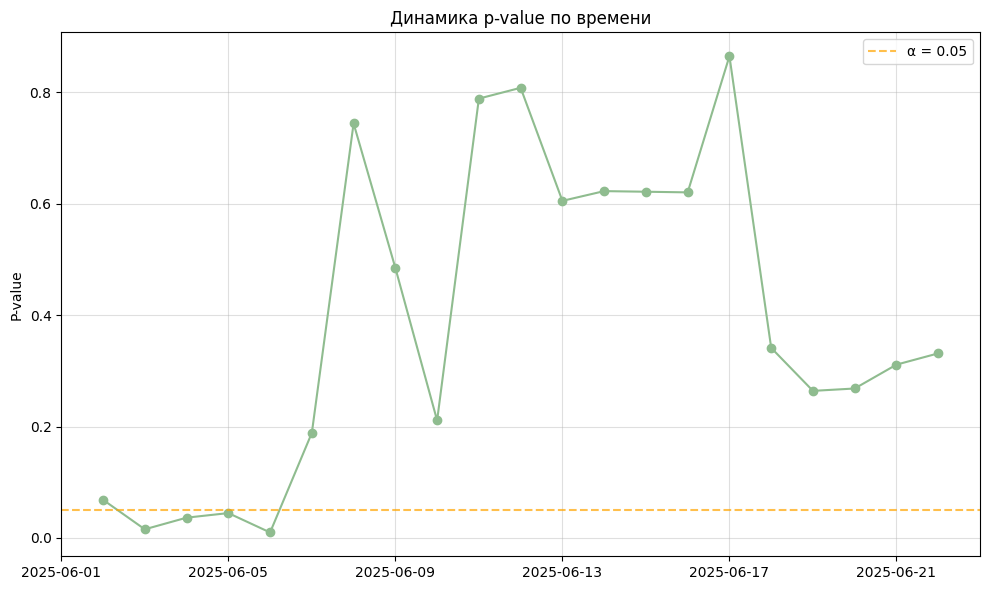

In [76]:
# Получаем уникальные даты
dates = df_ab['event_ts_day'].sort_values().unique()

p_values = []

for date in dates:
    # Данные до текущей даты включительно
    current_data = df_ab.query('event_ts_day <= @date')
    users_deposits_pval = current_data.groupby(['user_id', 'group'])['amount'].sum().reset_index()

    # Группируем по пользователям и группам
    control_amounts = users_deposits_pval.query('group == "control"')['amount']
    test_amounts = users_deposits_pval.query('group == "test"')['amount']

    _, p_value = ttest_ind(control_amounts, test_amounts)
    p_values.append(p_value)

pvalue_df = pd.DataFrame({
    'date': dates,
    'p_value': p_values})


plt.figure(figsize=(10, 6))
plt.plot(pvalue_df['date'], pvalue_df['p_value'], color='darkseagreen', marker='o')
plt.axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='α = 0.05')
plt.ylabel('P-value')
plt.title('Динамика p-value по времени')
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

In [77]:
# Данные для t-test
ttest_df_after_15_jun = df_ab.query('event_ts_day >= "2025-06-15"')
ttest_users_deposits_15 = ttest_df_after_15_jun.groupby(['user_id', 'group'])['amount'].sum().reset_index()
control_users_deposits_15 = ttest_users_deposits_15.query('group == "control"')['amount']
test_users_deposits_15 = ttest_users_deposits_15.query('group == "test"')['amount']

print('Если взять данные за третью треть эксперимента, то мы:')
# Проведем t-test
stat, p_value = ttest_ind(control_users_deposits_15, test_users_deposits_15)
if p_value < 0.05:
    print(f'Видим, что альтернативная гипотеза верна, разница статистически значима, так как p_value = {round(p_value, 3)}')
else:
    print(f'Видим, что нулевая гипотеза верна, разница не статистически значима, так как p_value = {round(p_value, 3)}')

Если взять данные за третью треть эксперимента, то мы:
Видим, что альтернативная гипотеза верна, разница статистически значима, так как p_value = 0.014


#### Барьерная метрика — конверсия из регистрации в первый депозит

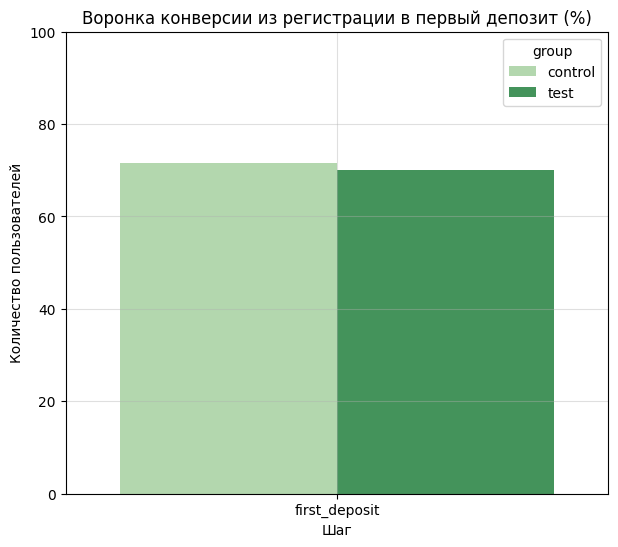

In [78]:
# Шаги воронки
barrier_steps = ['registration', 'first_deposit']

# Функция
def barrier_calculate_funnel(df, group, barrier_steps):
    group_df = df.query('group == @group')
    barrier_count = (
        group_df.query('event_name.isin(@barrier_steps)')
        .groupby(['event_name', 'group'], as_index=False)['user_id']
        .nunique()
        .rename(columns={'event_name': 'step', 'user_id': 'total_users'})
        .sort_values(by='total_users', ascending=False)
        .reset_index())

    # Конверсия от первого шага
    barrier_count['CR'] = (
        barrier_count['total_users'] / barrier_count['total_users'].iloc[0] * 100).round(2)
    
    return barrier_count

# Вычисляем конверсию для контрольной и тестовой групп
a_barrier_count = barrier_calculate_funnel(df_ab, 'control', barrier_steps)
b_barrier_count = barrier_calculate_funnel(df_ab, 'test', barrier_steps)

# Объединяем данные
merged_ab_barrier_cr = pd.concat([a_barrier_count, b_barrier_count], ignore_index=True)

# Визуализация воронки
plt.figure(figsize=(7, 6))
sns.barplot(data=merged_ab_barrier_cr[1::2], x='step', y='CR', hue='group', palette='Greens')
plt.title('Воронка конверсии из регистрации в первый депозит (%)')
plt.xlabel('Шаг')
plt.ylabel('Количество пользователей')
plt.grid(alpha=0.4)
plt.ylim(0, 100)
plt.show()

In [79]:
print(f'Барьерная метрика группы A = {a_barrier_count.iloc[1]["CR"]}$')
print(f'Ключевая метрика группы В = {b_barrier_count.iloc[1]["CR"]}$')
print(f'Абсолютная разница = {(a_barrier_count.iloc[1]["CR"] - b_barrier_count.iloc[1]["CR"]).round(2)}$ в пользу контрольной группы')
print(f'Относительная разница = {((a_barrier_count.iloc[1]["CR"] / b_barrier_count.iloc[1]["CR"] - 1) * 100).round(2)}% в пользу контрольной группы')

Барьерная метрика группы A = 71.54$
Ключевая метрика группы В = 70.04$
Абсолютная разница = 1.5$ в пользу контрольной группы
Относительная разница = 2.14% в пользу контрольной группы


- Нулевая гипотеза - воронка конверсии из регистрации в первый депозит между группами не отличается
- Альтернативная гипотеза - воронка конверсии из регистрации в первый депозит между группами отличается

In [80]:
# Проводим z-test пропорций
n_a_bar, n_b_bar = a_barrier_count['total_users'][0], b_barrier_count['total_users'][0]
m_a_bar, m_b_bar = a_barrier_count['total_users'][1], b_barrier_count['total_users'][1]

alpha = 0.05

proportion_zest_bar, p_value_ztest_bar = proportions_ztest(
    [m_a_bar, m_b_bar],
    [n_a_bar, n_b_bar],
    alternative='two-sided')

# Проведем z-test
if p_value_ztest_bar < 0.05:
    print(f'Альтернативная гипотеза верна, разница пропорций статистически значима, так как p_value = {round(p_value_ztest_bar, 2)}')
else:
    print(f'Нулевая гипотеза верна, разница пропорций не статистически значима, так как p_value = {round(p_value_ztest_bar, 2)}')

Нулевая гипотеза верна, разница пропорций не статистически значима, так как p_value = 0.12


#### Вспомогательная метрика 1 — конверсия из первого депозита во второй

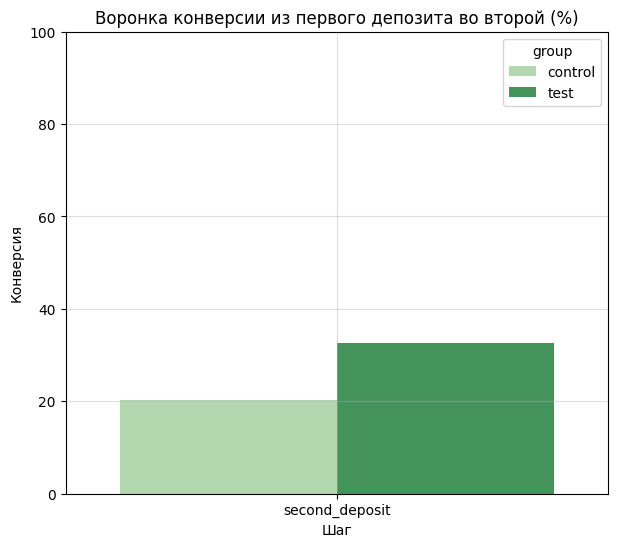

In [81]:
# Шаги воронки
additional_1_steps = ['first_deposit', 'second_deposit']

# Функция
def additional_1_calculate_funnel(df, group, additional_1_steps):
    group_df = df.query('group == @group')
    additional_1_count = (
        group_df.query('event_name.isin(@additional_1_steps)')
        .groupby(['event_name', 'group'], as_index=False)['user_id']
        .nunique()
        .rename(columns={'event_name': 'step', 'user_id': 'total_users'})
        .sort_values(by='total_users', ascending=False))

    # Конверсия от первого шага
    additional_1_count['CR'] = (
        additional_1_count['total_users'] / additional_1_count['total_users'].iloc[0] * 100).round(2)
    
    return additional_1_count

# Вычисляем конверсию для контрольной и тестовой групп
a_additional_1_count = additional_1_calculate_funnel(df_ab, 'control', additional_1_steps)
b_additional_1_count = additional_1_calculate_funnel(df_ab, 'test', additional_1_steps)

# Объединяем данные
merged_ab_additional_1_cr = pd.concat([a_additional_1_count, b_additional_1_count], ignore_index=True)

# Визуализация воронки
plt.figure(figsize=(7, 6))
sns.barplot(data=merged_ab_additional_1_cr[1::2], x='step', y='CR', hue='group', palette='Greens')
plt.title('Воронка конверсии из первого депозита во второй (%)')
plt.xlabel('Шаг')
plt.ylabel('Конверсия')
plt.grid(alpha=0.4)
plt.ylim(0, 100)
plt.show()

In [82]:
print(f'Вспомогательная метрика 1 группы A = {a_additional_1_count.iloc[1]["CR"]}$')
print(f'Вспомогательная метрика 1 группы В = {b_additional_1_count.iloc[1]["CR"]}$')
print(f'Абсолютная разница = {(b_additional_1_count.iloc[1]["CR"] - a_additional_1_count.iloc[1]["CR"]).round(2)}$ в пользу тестовой группы')
print(f'Относительная разница = {((b_additional_1_count.iloc[1]["CR"] / a_additional_1_count.iloc[1]["CR"] - 1) * 100).round(2)}% в пользу тестовой группы')

Вспомогательная метрика 1 группы A = 20.26$
Вспомогательная метрика 1 группы В = 32.61$
Абсолютная разница = 12.35$ в пользу тестовой группы
Относительная разница = 60.96% в пользу тестовой группы


- Нулевая гипотеза - воронка конверсии из первого депозита во второй между группами не отличается
- Альтернативная гипотеза - воронка конверсии из первого депозита во второй между группами отличается

In [83]:
# Проводим z-test пропорций
n_a_add1, n_b_add1 = a_additional_1_count['total_users'][0], b_additional_1_count['total_users'][0]
m_a_add1, m_b_add1 = a_additional_1_count['total_users'][1], b_additional_1_count['total_users'][1]

alpha = 0.05

proportion_zest_add1, p_value_ztest_add1 = proportions_ztest(
    [m_a_add1, m_b_add1],
    [n_a_add1, n_b_add1],
    alternative='two-sided')

# Проведем z-test
if p_value_ztest_add1 < 0.05:
    print(f'Альтернативная гипотеза верна, разница пропорций статистически значима, так как p_value = {round(p_value_ztest_add1, 30)}')
else:
    print(f'Нулевая гипотеза верна, разница пропорций не статистически значима, так как p_value = {round(p_value_ztest_add1, 30)}')

Альтернативная гипотеза верна, разница пропорций статистически значима, так как p_value = 1.9400000000000003e-28


#### Вспомогательная метрика 2 — средняя сумма всех депозитов на пользователя, который открыл хотя бы один депозит

Вспомогательная метрика 2 группы A = 135.5$
Вспомогательная метрика 2 группы В = 141.4$
Абсолютная разница = 5.9$ в пользу тестовой группы
Относительная разница = 4.35% в пользу тестовой группы


/tmp/ipykernel_231548/2000852098.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=add2_group_df, x='group', y='amount', palette='Greens')


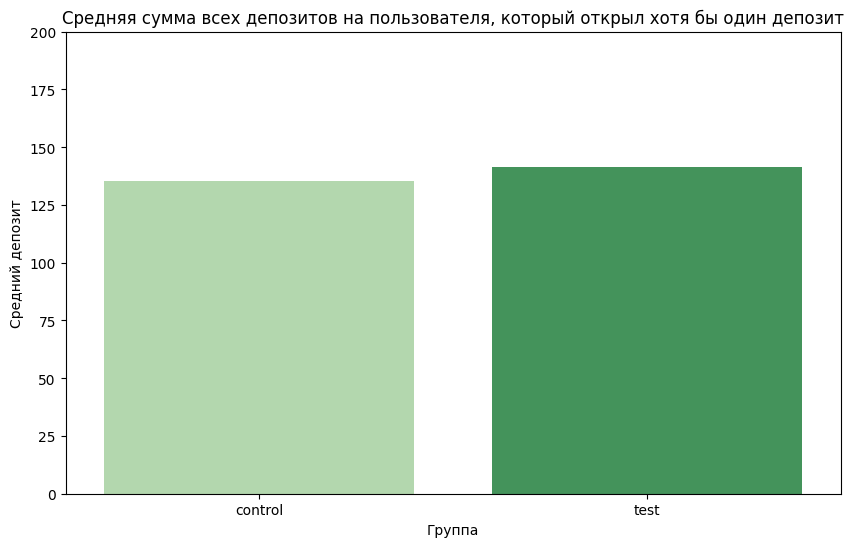

In [84]:
# Считаем вспомогательную метрику 2
def additional_2_deposits(df, group):
    group_df = df.query('group == @group and event_name in ["first_deposit", "second_deposit"]')
    users_deposits = group_df.groupby('user_id')['amount'].sum().reset_index()
    mean_users_deposit = users_deposits['amount'].mean().round(2)
    return mean_users_deposit

a_mean_additional_2_deposits = additional_2_deposits(df_ab, 'control')
b_mean_additional_2_deposits = additional_2_deposits(df_ab, 'test')

print(f'Вспомогательная метрика 2 группы A = {a_mean_additional_2_deposits}$')
print(f'Вспомогательная метрика 2 группы В = {b_mean_additional_2_deposits}$')
print(f'Абсолютная разница = {(b_mean_additional_2_deposits - a_mean_additional_2_deposits).round(2)}$ в пользу тестовой группы')
print(f'Относительная разница = {((b_mean_additional_2_deposits / a_mean_additional_2_deposits - 1) * 100).round(2)}% в пользу тестовой группы')


plt.figure(figsize=(10, 6))
add2_group_df = df_ab.query('event_name in ["first_deposit", "second_deposit"]')
add2_group_df = add2_group_df.groupby(['user_id', 'group'])['amount'].sum().reset_index()
add2_group_df = add2_group_df.groupby('group')['amount'].mean().reset_index()
sns.barplot(data=add2_group_df, x='group', y='amount', palette='Greens')
plt.title('Cредняя сумма всех депозитов на пользователя, который открыл хотя бы один депозит')
plt.xlabel('Группа')
plt.ylabel('Средний депозит')
plt.ylim(0, 200)
plt.show()

- Нулевая гипотеза - средняя сумма всех депозитов на пользователя, который открыл хотя бы один депозит между группами не отличается
- Альтернативная гипотеза - средняя сумма всех депозитов на пользователя, который открыл хотя бы один депозит между группами отличается

In [85]:
# Данные для t-test
df_add2 = df_ab.query('event_name in ["first_deposit", "second_deposit"]')
add_2_ttest_users_deposits = df_add2.groupby(['user_id', 'group'])['amount'].sum().reset_index()
add2_control_users_deposits = add_2_ttest_users_deposits.query('group == "control"')['amount']
add2_test_users_deposits = add_2_ttest_users_deposits.query('group == "test"')['amount']

# Проведем t-test
add2_stat, add2_p_value = ttest_ind(add2_control_users_deposits, add2_test_users_deposits)
if p_value < 0.05:
    print(f'Альтернативная гипотеза верна, так как разница статистически значима, так как p_value = {round(p_value, 3)}')
else:
    print(f'Нулевая гипотеза верна, так как разница не статистически значима, так как p_value = {round(p_value, 3)}')

Альтернативная гипотеза верна, так как разница статистически значима, так как p_value = 0.014


### 4. Анализ изменений суммы депозитов на платящего пользователя

Новая фича могла повлиять на поведение пользователей.
- Пользователи, которые раньше вносили небольшие суммы, могли стать более осторожными, сократить свои вложения или совсем перестать платить. Это отразится в снижении 25-го перцентиля суммы депозитов в тестовой группе.
- Пользователи, которые склонны к более крупным инвестициям, могли сильнее вовлечься в продукт и начать вносить больше средств. Это отразится в росте 75-го перцентиля.

Используя бутстрап, попытаюсь найти разницу перцентилей (25, 50, 75) суммы всех депозитов на платящего пользователя в контрольной и тестовой группах

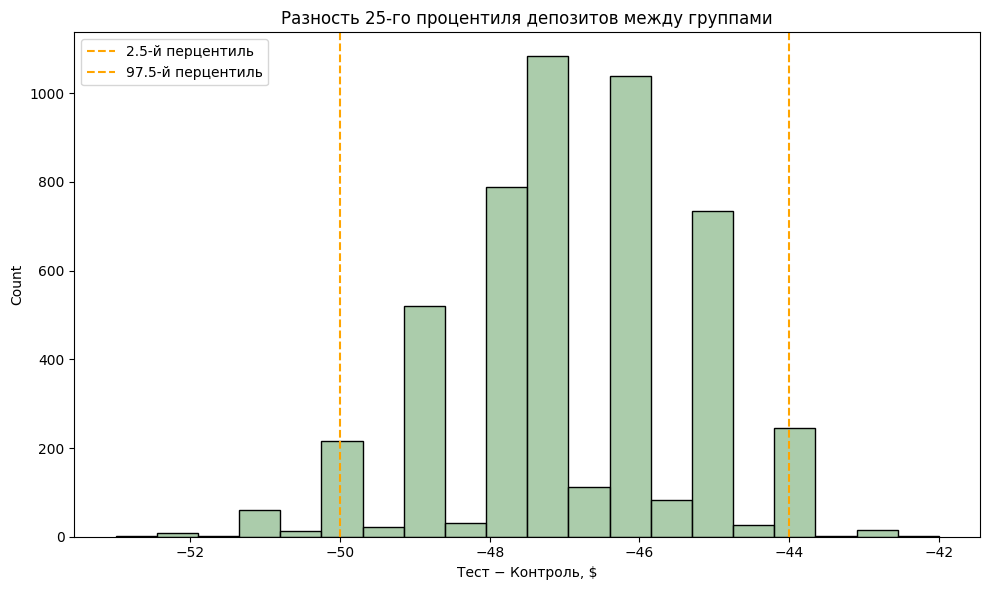

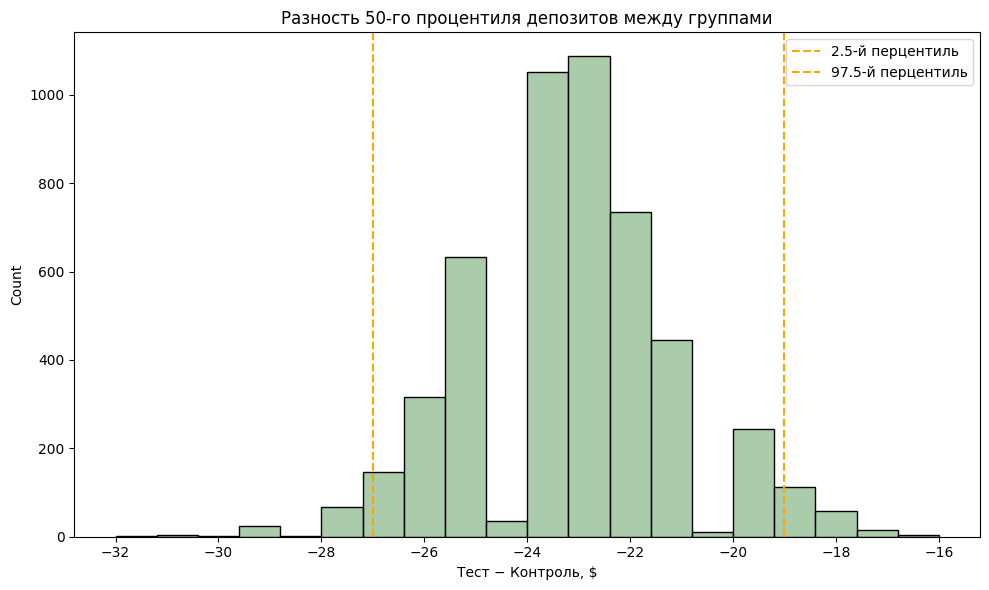

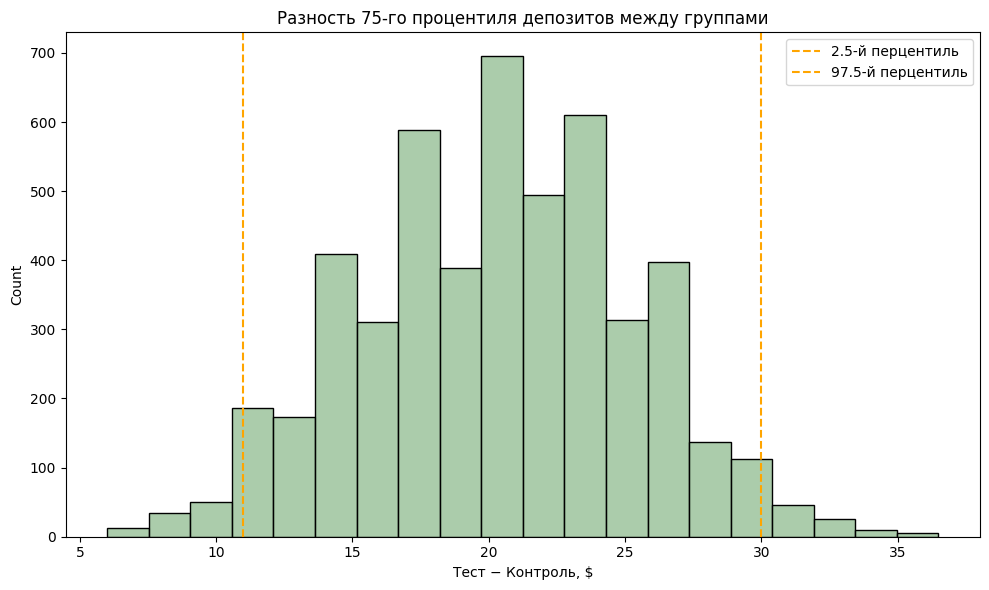

In [86]:
# Группировка
group_a_boot = (
    df_ab
    .query('group == "control" and event_name in ["first_deposit", "second_deposit"]')
    .groupby('user_id')['amount']
    .sum())

group_b_boot = (
    df_ab
    .query('group == "test" and event_name in ["first_deposit", "second_deposit"]')
    .groupby('user_id')['amount']
    .sum())

np.random.seed(42)

for perc in [25, 50, 75]:
    # Настройка параметров
    n_iterations = 5000
    boot_diffs = []

    # Цикл
    for i in range(n_iterations):
        boot_a = np.random.choice(group_a_boot.values, size=len(group_a_boot), replace=True)
        boot_b = np.random.choice(group_b_boot.values, size=len(group_b_boot), replace=True)
        
        a_percentile = np.percentile(boot_a, perc)
        b_percentile = np.percentile(boot_b, perc)
        boot_diffs.append(b_percentile - a_percentile)

    # Превращаем в массив
    boot_diffs = np.array(boot_diffs)

    # Доверительный интервал (перцентильный метод)
    ci_low, ci_high = np.percentile(boot_diffs, [2.5, 97.5])

    plt.figure(figsize=(10, 6))
    sns.histplot(data=boot_diffs, bins=20, color='darkseagreen')
    plt.axvline(ci_low, linestyle='--', color='orange', label='2.5-й перцентиль')
    plt.axvline(ci_high, linestyle='--', color='orange', label='97.5-й перцентиль')
    plt.xlabel(f'Тест − Контроль, $')
    plt.title(f'Разность {perc}-го процентиля депозитов между группами')
    plt.legend()
    plt.tight_layout()
    plt.show()

- Сегмент «малых депозитов»
  - Гипотеза подтвердилась. 25-й процентиль в тестовой группе смещён влево относительно контроля (доверительный интервал целиком ниже 0) – мелкие вкладчики действительно стали депонировать меньше или вовсе прекратили пополнять счёт.

- Сегмент «крупных депозитов»  
  - Гипотеза подтвердилась. 75-й процентиль в тесте смещён вправо (доверительный интервал полностью выше 0), что указывает на рост сумм у пользователей, склонных инвестировать крупнее.

- Поляризация поведения
  - Новая фича одновременно уменьшила активность консервативных клиентов и усилила вовлечённость «тяжёлых» инвесторов, что подтверждает исходную гипотезу о разнонаправленном влиянии на разные когорты.

- Потенциальные причины снижения медианы:
    - Образовательный онбординг с подробной информацией о рисках привел к более осознанному принятию решений
    - Особенность онбординга, который сделал так, что консервативные пользователи (включая "средних" инвесторов) стали еще более осторожными, а амбициозные инвесторы получили больше уверенности и стали вкладывать крупнее


### Итоговый вывод по A/B-тесту нового онбординга

#### Эффект

- **Все три гипотезы подтверждены**:  
  - рост средней суммы депозитов,  
  - сдвиг распределения риска,  
  - дополнительная гипотеза о поляризация поведения когорт по рискованности активов   
- **Ключевая метрика – средний депозит на пользователя**  
  -  Первая неделя — траектории теста и контроля совпадают.  
  -  Со второй недели начинается **резкий рост** тестовой группы; вклад, возможно, даёт в основном верхний 25% пользователей по объёму депозитов.  
  - p-value < 0,02 второй недели теста - статистически и практически значимый эффект
  - Временная динамика p-value подтверждает гипотезу о поляризации поведения (Первоначальная нестабильность связана с малой выборкой, постепенное снижение и стабилизация p-value отражает накопление эффекта от образовательного онбординга)  


- **Вспомогательные метрики** (конверсии во второй депозит, агрегированная выручка) тоже выросли и статистически устойчивы.

- **Барьерная метрика** (доля установок → первый депозит) снизилась на 1,5 п.п., но падение не достигло статистической значимости: внедрение не отсеивает важные сегменты.

- **Поляризация поведения**:
    - 25-й перцентиль депозитов ушёл вниз - осторожные инвесторы стали вносить меньше.
    - 75-й перцентиль вырос - “киты” вкладывают заметно больше.
 
#### Вариант развития А/В
- Продлить эксперимент ещё на 1–2 недели для подтверждения устойчивости эффекта и мониторинга барьерной метрики.
- Выяснить точные когорты (страны, размеры первого взноса, риск-профиль), которые дают всплеск депозитов, и прицельно масштабировать фичу.

#### Вывод

Если цель — максимизация выручки и удержание “тяжёлых” клиентов, новая модель онбординга готова к масштабированию.  
Если приоритет — сохранение широкой базы пользователей и контроль репутационных рисков, рекомендуется A/B тест с дополнительно разработанным сценарным обучением для начинающих инвесторов и потенциальным порогом для вложения за определенный промежуток времени и предупреждениями о рисках вкладов в высокорисковые активы с целью минимизации гэмблинг-активности пользователей